# __<center>Credit Card Default Prediction</center>__

# Objective
Objektif penggunaan klasifikasi pada data kredit bank mencakup peningkatan keakuratan penilaian kredit untuk mengidentifikasi pelanggan berisiko tinggi gagal bayar. Penerapan teknik ini memungkinkan bank memahami pelanggannya dengan lebih baik dan membuat keputusan yang lebih informatif, meningkatkan kepuasan pelanggan dan profitabilitas secara keseluruhan.

# **ii. SQL Query**

``` python
# Query data 
from google.colab import auth
from google.cloud import bigquery

# Authenticate the user
auth.authenticate_user()
print('Authenticated')


# Set up the BigQuery client
project_id = "dani017"
client = bigquery.Client(project=project_id)

Define the query with the specified conversions and limit
query = '''
SELECT 

    limit_balance,
    CAST(sex AS INT64) AS sex,
    CAST(education_level AS INT64) AS education_level,
    CAST(marital_status AS INT64) AS marital_status,
    age,
    pay_0,
    pay_2,
    pay_3,
    pay_4,
    CAST(pay_5 AS FLOAT64) AS pay_5,
    CAST(pay_6 AS FLOAT64) AS pay_6,
    bill_amt_1,
    bill_amt_2,
    bill_amt_3,
    bill_amt_4,
    bill_amt_5,
    bill_amt_6,
    pay_amt_1,
    pay_amt_2,
    pay_amt_3,
    pay_amt_4,
    pay_amt_5,
    pay_amt_6,
    CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM bigquery-public-data.ml_datasets.credit_card_default
LIMIT 33983
'''

# Execute the query and convert the result to a pandas DataFrame
df = client.query(query).to_dataframe()

# Save the DataFrame to a CSV file
csv_filename = 'P1G5_Set_1_Ahmad_Dani.csv'
df.to_csv(csv_filename, index=False)

# Display the first 10 rows of the DataFrame
print("First 10 rows of the dataset:")
print(df.head(10))

# Display the last 10 rows of the DataFrame
print("\nLast 10 rows of the dataset:")
print(df.tail(10))
```

# **iii. Import Library**

In [1]:
# Modul Data Loading
import pandas as pd
import numpy as np

# Modul EDA
import matplotlib.pyplot as plt
import seaborn as sns
from phik.report import plot_correlation_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Modul Feature Engineering
from feature_engine.outliers import Winsorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline


# Modul Machine Learning Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Modul Model Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

# Menyimpan Model
import pickle

# Mengindentifaksi peringatan
import warnings
warnings.filterwarnings('ignore')

### **Sumber Data**
- [Klik disini ( BiqQuery )](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table&project=dani017&ws=!1m5!1m4!4m3!1sbigquery-public-data!2sml_datasets!3scredit_card_default) 


### **Daftar Konten**
```python
iv.     Data Loading
v.      Exploratory Data Analysis 
vi.     Feature Engineering
vii.    Model Definition
viii.   Model Training
ix.     Model Evaluation
x.      Model Saving
xi.     Model Inference
xii.    Kesimpulan
```

# **iv. Data Loading**

In [3]:
# Menampilkan dataset 
dataset = pd.read_csv('P1G5_Set_1_Ahmad_Dani.csv')
display(dataset.head(),dataset.tail())

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [4]:
# Melihat informasi kolom
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 


-   Dataset terdiri dari 2965 baris dan 24 kolom.
-   Terdapat 20 fitur yang valuesnya bertipe float dan 4 bertype integer.
-   Tidak terdapat missing values.

In [5]:
# Mengecek statistik sederhana dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


Berdasarkan hasil perhitungan statistik sederhana, hampir semua fitur memiliki nilai rata-rata yang jauh dari nilai maksimum, yang artinya kemungkinan data tidak terdistribusi normal sehingga akan dilakukan pengecekan lebih lanjut.

In [6]:
# Duplikasi data
dataset1 = dataset.copy()

dataset1.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


# **v. Exploratory Data Analysis** 

Tujuan cardinality mengetahui nilai - nilai dalam dataset untuk nantinya kolom - kolom itu akan kita lakukan pembersihan yang tujuannya untuk mempermudah saat melakukan modelling. Berikut adalah tahap - tahapannya:
* Melihat outlier
* Melihat data duplikat
* Melihat data yang memilki nilai "NULL"
* Melihat nama - nama dalam kolom

In [7]:
# Membuat list untuk menyimpan data
cardinality_dict = []

# Menghitung dan menyimpan cardinality untuk setiap kolom
for column in dataset1.columns:
    cardinality = dataset1[column].nunique()
    cardinality_dict.append({'Column Name': column, 'Cardinality': cardinality})

# Membuat DataFrame dari list
cardinality_df = pd.DataFrame(cardinality_dict)

# Menyortir DataFrame berdasarkan kardinalitas (Cardinality) secara menurun
sorted_cardinality_df = cardinality_df.sort_values(by='Cardinality', ascending=False)

# Menampilkan DataFrame yang telah disortir
print("Cardinality Kolom")
print(sorted_cardinality_df.to_string())

Cardinality Kolom
                   Column Name  Cardinality
11                  bill_amt_1         2643
12                  bill_amt_2         2592
13                  bill_amt_3         2549
14                  bill_amt_4         2504
15                  bill_amt_5         2482
16                  bill_amt_6         2461
17                   pay_amt_1         1415
18                   pay_amt_2         1372
19                   pay_amt_3         1302
20                   pay_amt_4         1214
21                   pay_amt_5         1194
22                   pay_amt_6         1189
0                limit_balance           59
4                          age           49
5                        pay_0           11
8                        pay_4           10
6                        pay_2           10
9                        pay_5            9
7                        pay_3            9
10                       pay_6            8
2              education_level            7
3             

- Terlihat fitur yang memiliki kardinalitas tinggi yaitu yang memiliki nilai unik tinggi. Fitur yang memiliki kardinalitas tinggi yaitu **bill_amt_1**, kemudian diikuti oleh **bill_amt_2**, dan **bill_amt_3** karena memiliki nilai unique ratusan ribu sampai ribuan.
- Fitur yang memiliki kardinalitas rendah seperti **education_level**, **marital_status**, **sex** dan **default_payment_next_month** biasanya merupakan kolom kategorikal.

**Melihat Missing Value**

In [8]:
# Persentase missing value
dataset1.isna().sum()/dataset1.shape[0]*100

limit_balance                 0.0
sex                           0.0
education_level               0.0
marital_status                0.0
age                           0.0
pay_0                         0.0
pay_2                         0.0
pay_3                         0.0
pay_4                         0.0
pay_5                         0.0
pay_6                         0.0
bill_amt_1                    0.0
bill_amt_2                    0.0
bill_amt_3                    0.0
bill_amt_4                    0.0
bill_amt_5                    0.0
bill_amt_6                    0.0
pay_amt_1                     0.0
pay_amt_2                     0.0
pay_amt_3                     0.0
pay_amt_4                     0.0
pay_amt_5                     0.0
pay_amt_6                     0.0
default_payment_next_month    0.0
dtype: float64

Dari data diatas tidak adanya missing value dari kolom target dan features. Ini akan mempermudah kita dalam melakukan proses selanjutnya.

**Melihat dan menghapus data duplikat**

In [9]:
# Melihat baris duplikat
duplicates_df = dataset1[dataset1.duplicated()]
print("Data duplikat:")
print(duplicates_df)

# Menghapus baris duplikat
dataset1 = dataset1.drop_duplicates()
print("Dataset setelah menghapus duplikat:")
print(dataset1)

Data duplikat:
      limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
2815       200000.0    2                1               1  34.0    1.0   -2.0   

      pay_3  pay_4  pay_5  ...  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  \
2815   -2.0   -2.0   -2.0  ...         0.0         0.0         0.0        0.0   

      pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  \
2815        0.0        0.0        0.0        0.0        0.0   

      default_payment_next_month  
2815                           0  

[1 rows x 24 columns]
Dataset setelah menghapus duplikat:
      limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
0           80000.0    1                6               1  54.0    0.0    0.0   
1          200000.0    1                4               1  49.0    0.0    0.0   
2           20000.0    2                6               2  22.0    0.0    0.0   
3          260000.0    2                4               2  33.0    0.0    0.0  

In [10]:
# Melihat kembali kolom
dataset1.shape

(2964, 24)

Dari informasi diatas kita sudah berhasil menghapus 1 data duplikat yang awalnya memiliki 2965 baris menjadi 2964, ini bertujuan untuk memudahkan kita untuk melakukan proses selanjutnya karena tidak adanya data duplikat.

**Melihat kolerasi antar kolom numerik dan kategorikal terhadap default payment**

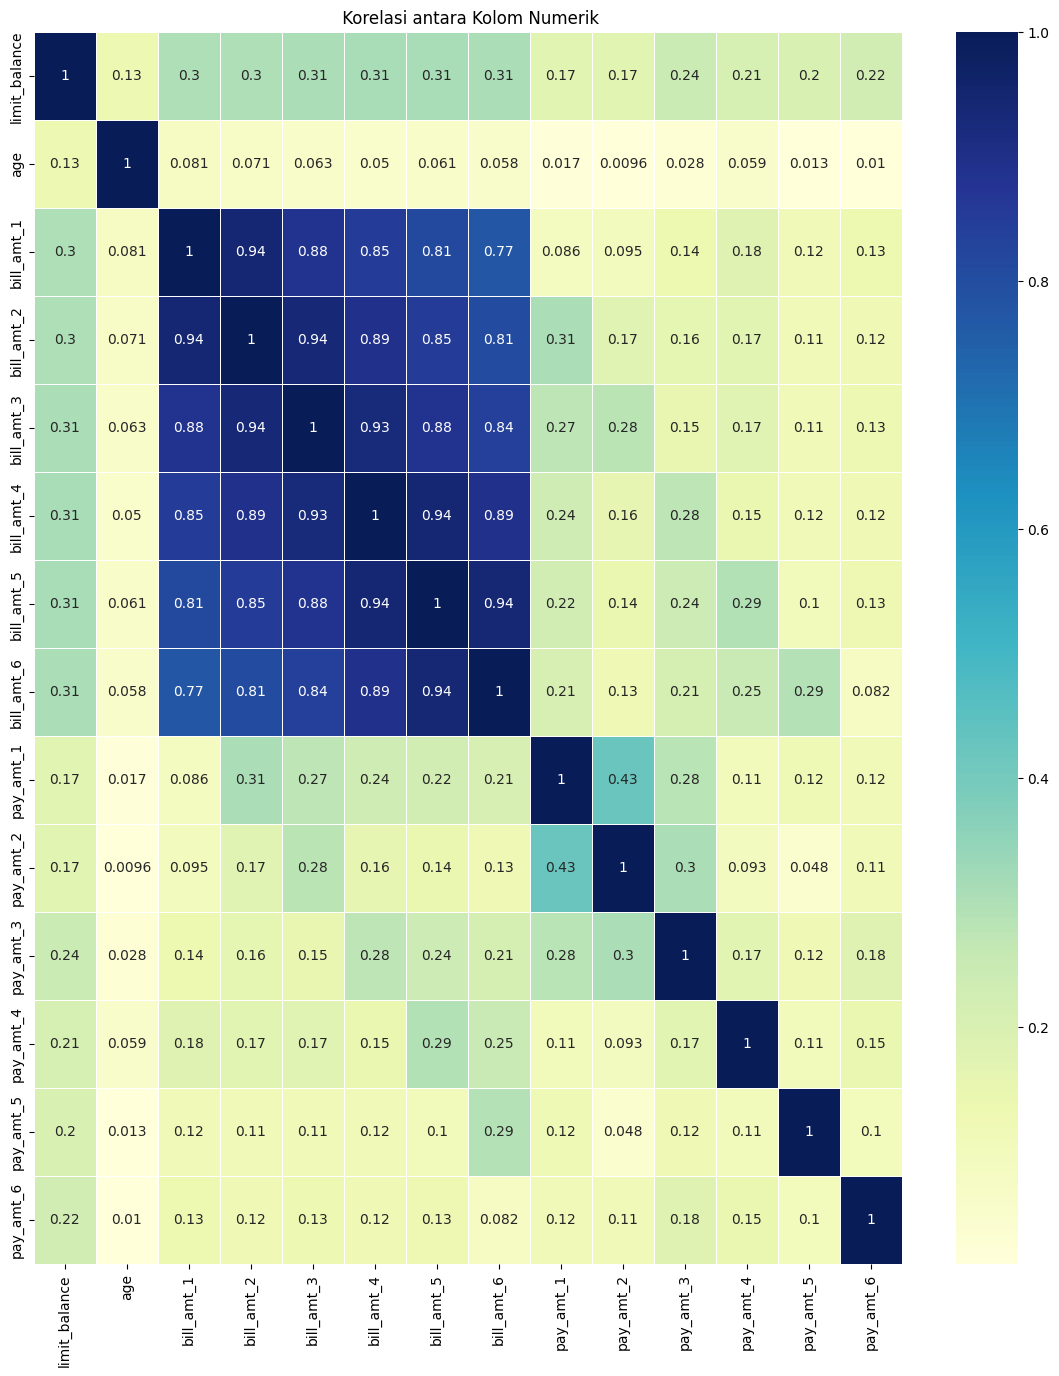

In [11]:
# Daftar kolom numerik yang akan diperiksa
kolom_numerik = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 
                  'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 
                  'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 
                  'pay_amt_5', 'pay_amt_6']

# Membuat visualisasi korelasi
matriks_korelasi = dataset1[kolom_numerik].corr()
plt.figure(figsize=(14, 16))
sns.heatmap(matriks_korelasi, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title(' Korelasi antara Kolom Numerik')
plt.show()

Heatmap ini menunjukkan korelasi antara kolom numerik dalam suatu dataset, di mana warna biru tua menunjukkan korelasi negatif kuat, hijau menunjukkan korelasi rendah atau netral, dan kuning menunjukkan korelasi positif kuat. Sumbu horizontal dan vertikal berisi nama-nama kolom, seperti `limit_balance`, `age`, `pay_0` hingga `pay_6`, `bill_amt_1` hingga `bill_amt_6`, serta `pay_amt_1` hingga `pay_amt_6`. Angka dalam kotak adalah koefisien korelasi Pearson, dengan nilai berkisar dari -1 hingga 1. Pengamatan utama termasuk korelasi tinggi positif antara kolom `bill_amt` dan `pay`, korelasi negatif antara `pay_0` dengan beberapa kolom pembayaran, serta korelasi menengah antara `limit_balance` dan jumlah tagihan.

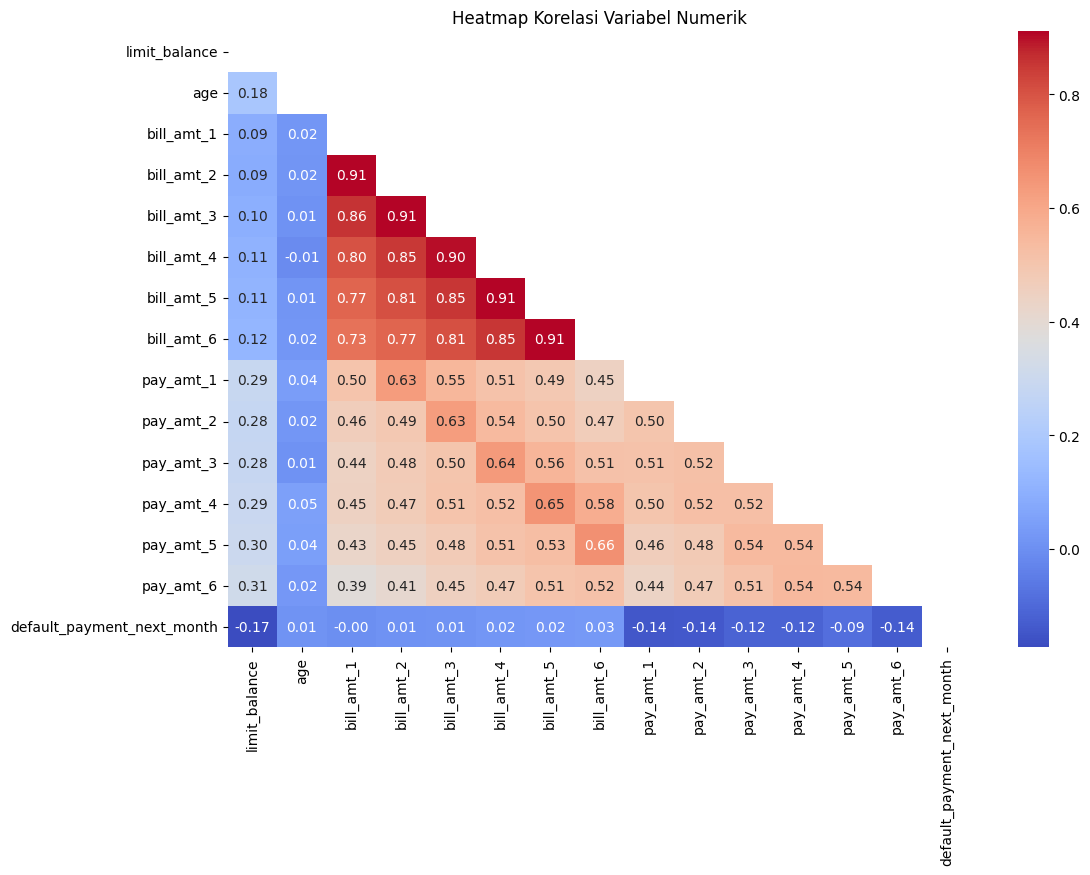

In [12]:
# Membuat DataFrame baru dengan kolom yang relevan dari dataset asli
df_numerik = dataset1[['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
                       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']]

# Menghitung matriks korelasi menggunakan metode Spearman
korelasi = df_numerik.corr(method='spearman')

# Menampilkan ukuran plot untuk memastikan visualisasi yang baik
plt.figure(figsize=(12, 8))

# Membuat heatmap dari matriks korelasi
sns.heatmap(korelasi, annot=True, mask=np.triu(korelasi), cmap='coolwarm', fmt='.2f')

# Menambahkan judul untuk heatmap
plt.title('Heatmap Korelasi Variabel Numerik')

# Menampilkan plot
plt.show()


Heatmap yang menunjukkan korelasi antara variabel numerik dalam dataset, dengan warna merah menunjukkan korelasi positif kuat, warna biru menunjukkan korelasi negatif kuat, dan warna putih menunjukkan korelasi rendah atau netral.

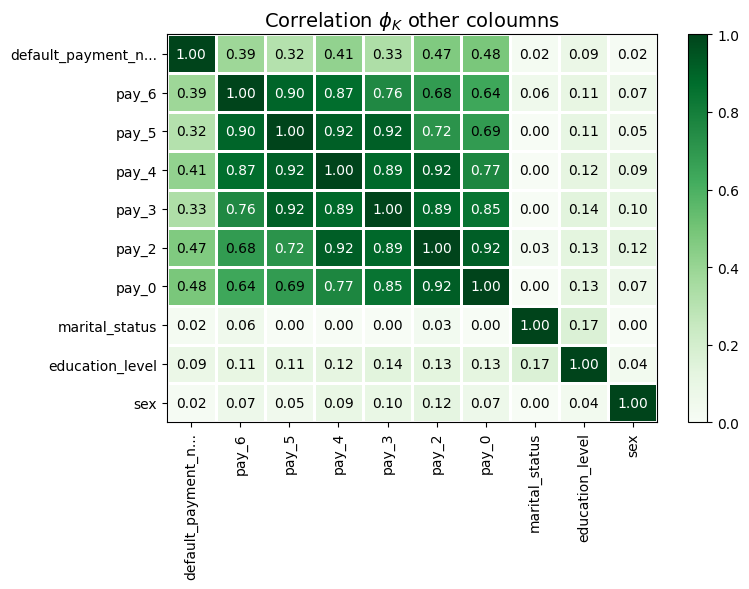

In [13]:
# Mengimpor kolom-kolom yang relevan dari dataset1 ke dalam dfCat
dfCat = dataset1[['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']]

# Menentukan kolom yang bersifat interval
interval_columns = ['default_payment']

# Menghitung matriks phik untuk dfCat dengan mempertimbangkan interval_columns
phik_matrix = dfCat.phik_matrix(interval_cols=interval_columns)

# Memvisualisasikan matriks korelasi menggunakan plot_correlation_matrix
plot_correlation_matrix(phik_matrix.values,
                        x_labels=phik_matrix.columns,
                        y_labels=phik_matrix.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"Correlation $\phi_K$ other coloumns",
                        fontsize_factor=1,
                        figsize=(8, 6))

# Menyesuaikan tata letak plot agar lebih rapi
plt.tight_layout()

Gambar matriks korelasi antara kolom-kolom numerik dalam dataset, dengan nilai korelasi berkisar antara -1 dan 1. Korelasi positif sempurna (1) berarti kedua variabel meningkat bersama, sementara korelasi negatif sempurna (-1) berarti ketika satu variabel meningkat, yang lain menurun. Korelasi nol (0) menunjukkan tidak ada hubungan linier. Heatmap ini mengungkapkan bahwa terdapat korelasi positif sangat kuat antara variabel `bill_amt_1` hingga `bill_amt_6`, serta antara `pay_2` hingga `pay_6`, menunjukkan keterkaitan yang kuat dalam jumlah tagihan dan pola pembayaran dari waktu ke waktu. Sementara itu, `limit_balance` menunjukkan korelasi sedang dengan beberapa variabel pembayaran dan jumlah tagihan, dan `pay_amt_1`, `pay_amt_2`, serta `pay_amt_3` menunjukkan korelasi sedang satu sama lain. Variabel `age` memiliki korelasi sangat rendah dengan sebagian besar variabel lainnya, menandakan bahwa usia tidak memiliki hubungan linier yang kuat dengan limit kredit, pola pembayaran, atau jumlah tagihan.

Berdasarkan heatmap yang memuat informasi korelasi di atas, dapat disimpulkan bahwa hanya status pembayaran bulanan (`pay_1` hingga `pay_6`) dan tingkat pendidikan (`education_level`) yang terhubung secara signifikan dengan keputusan gagal bayar. Dari heatmap korelasi tersebut, tampak jelas bahwa variabel `limit_balance` adalah satu-satunya yang berhubungan dengan variabel `default_payment`.

Dari 3 gambar heatmap diatas ini menunjukkan korelasi antara kolom numerik dalam dataset, dengan nilai berkisar dari -1 hingga 1. Korelasi positif kuat ditemukan antara `bill_amt_1` hingga `bill_amt_6` dan antara `pay_2` hingga `pay_6`, menunjukkan keterkaitan dalam jumlah tagihan dan pola pembayaran. `Limit_balance` memiliki korelasi sedang dengan beberapa kolom pembayaran dan tagihan, sementara `age` memiliki korelasi sangat rendah dengan sebagian besar variabel lainnya. Variabel `default_payment_next_month` menunjukkan korelasi negatif lemah dengan `limit_balance` dan beberapa kolom `pay_amt`, serta korelasi rendah atau netral dengan kolom lainnya.

**Melihat distribusi data**

Kolom Numerikal: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']
Kolom Kategorikal: ['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


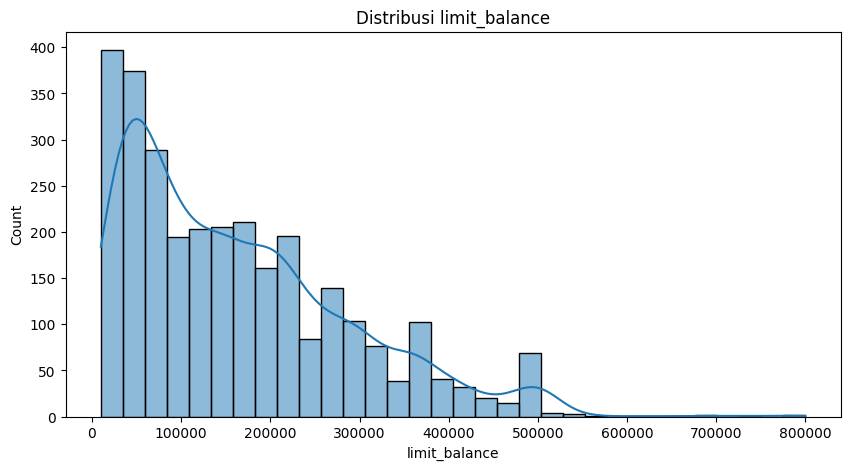

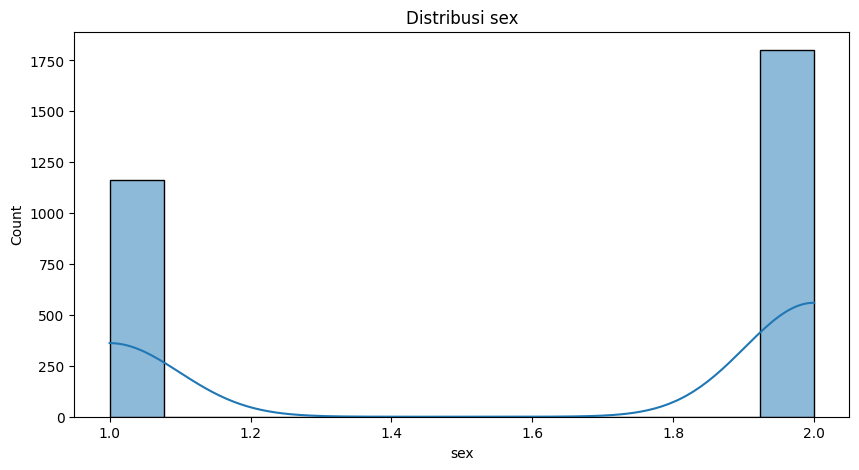

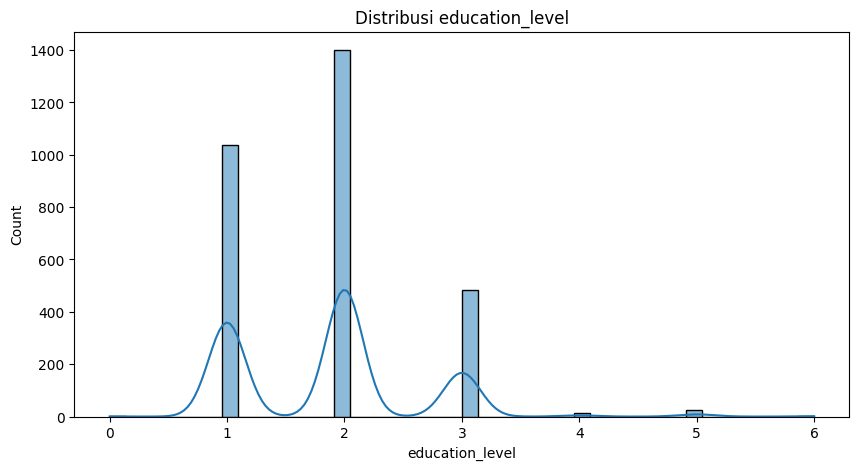

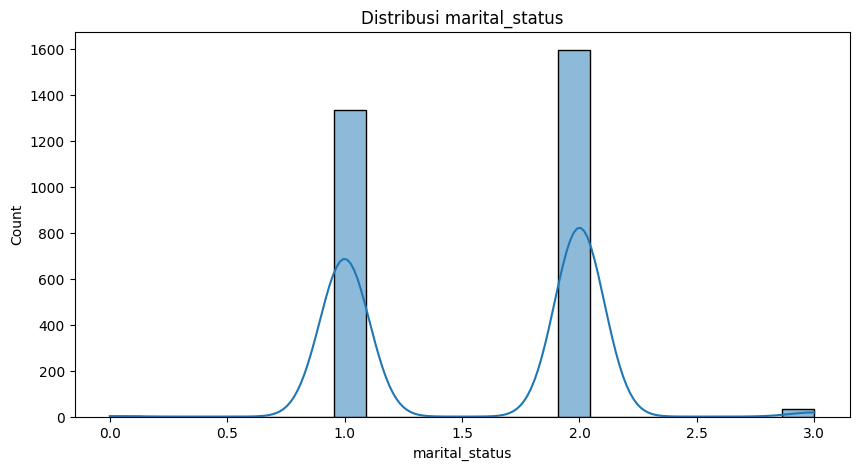

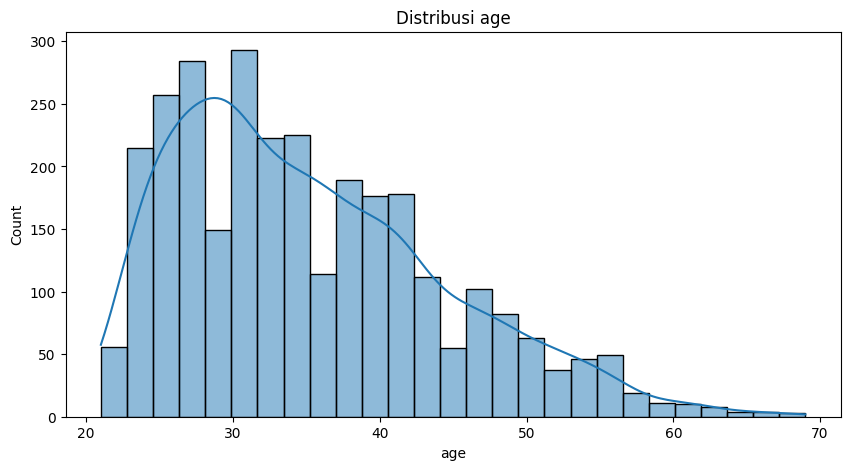

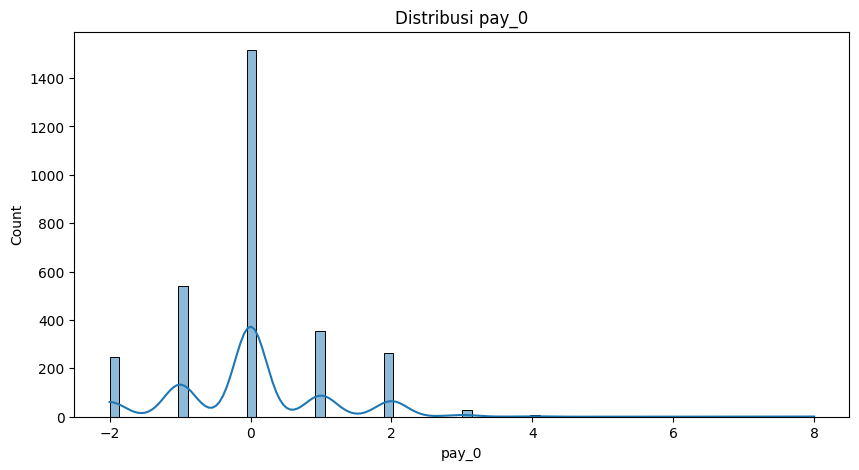

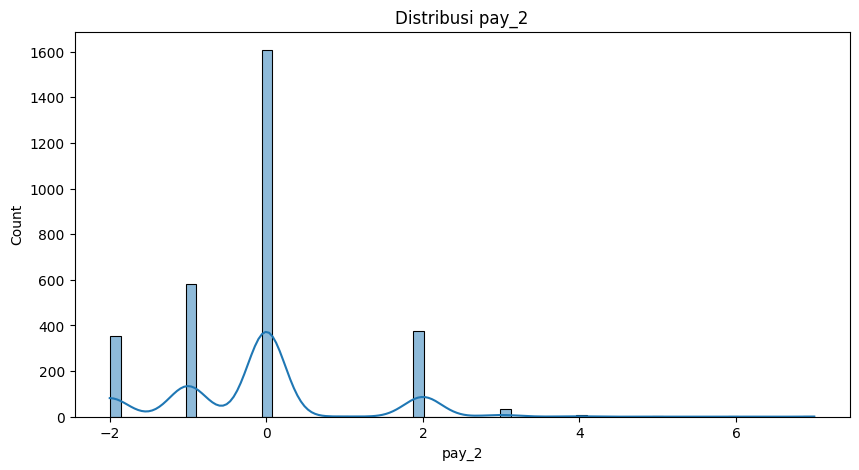

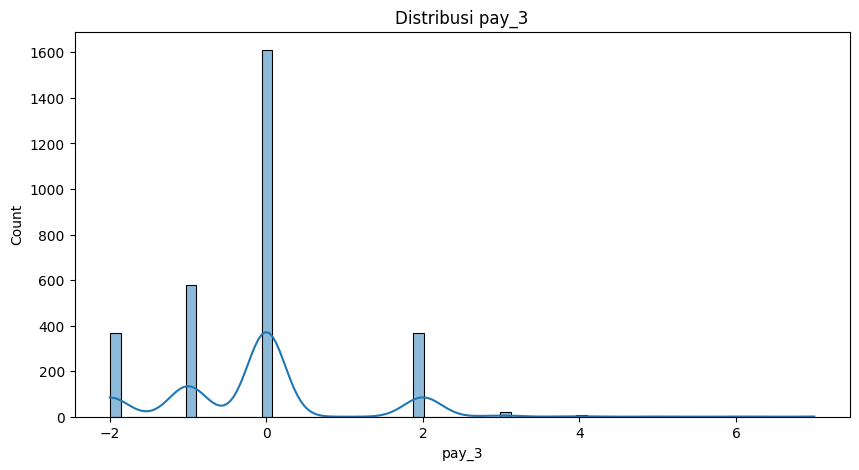

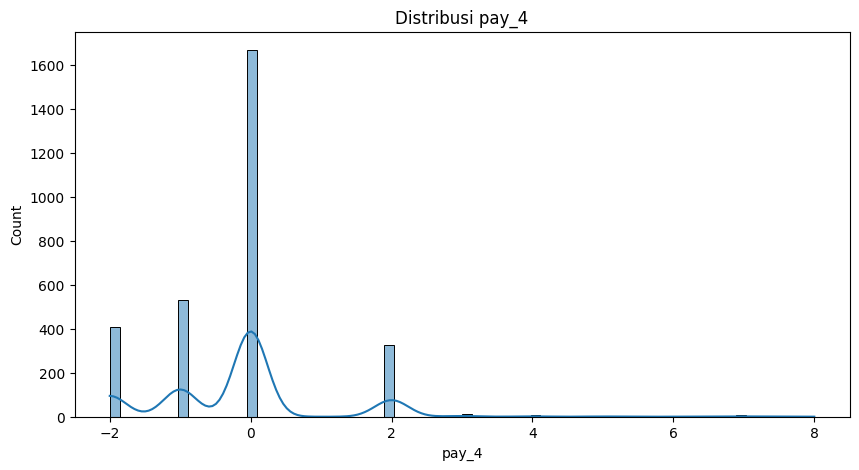

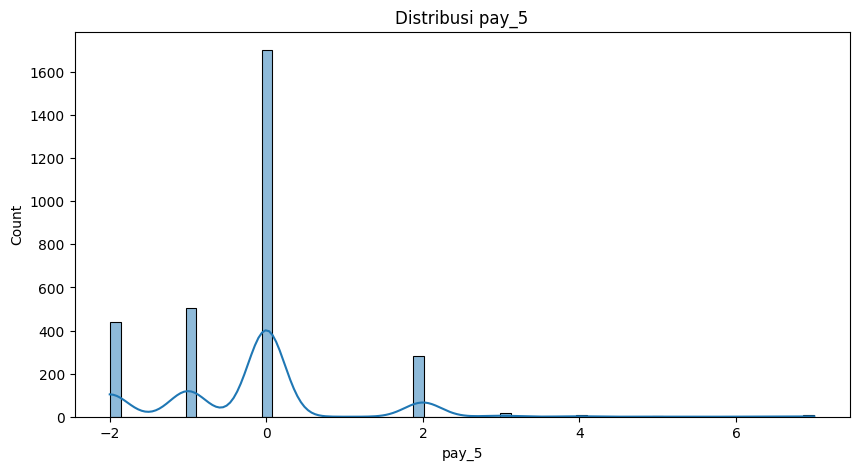

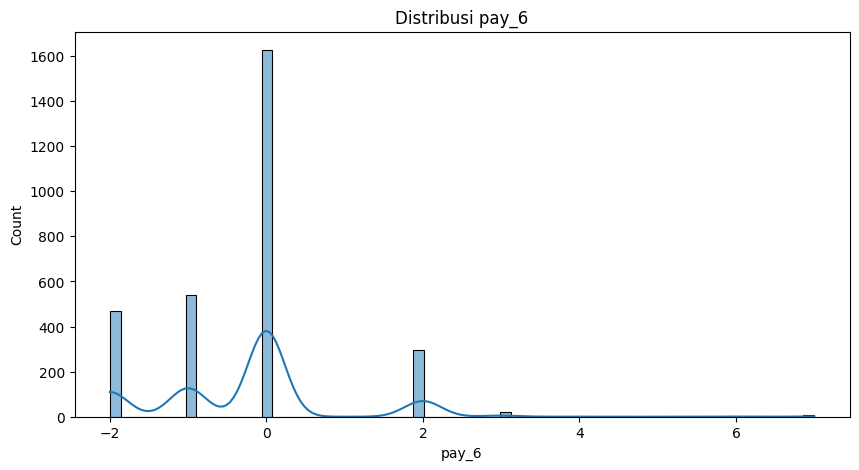

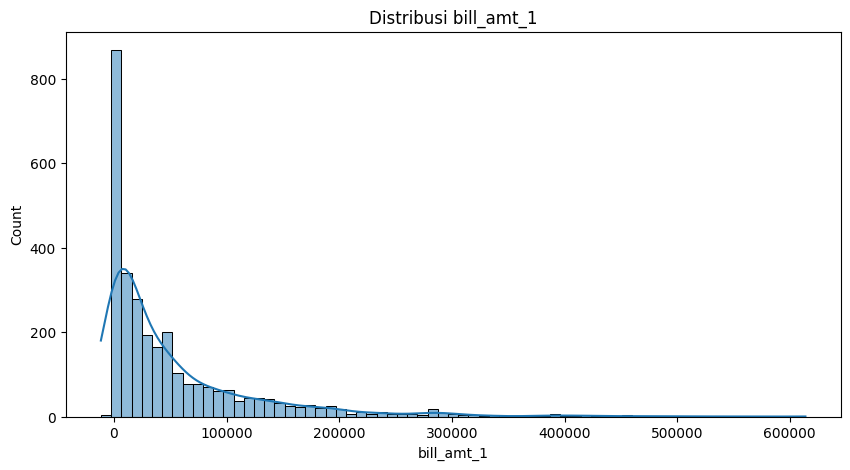

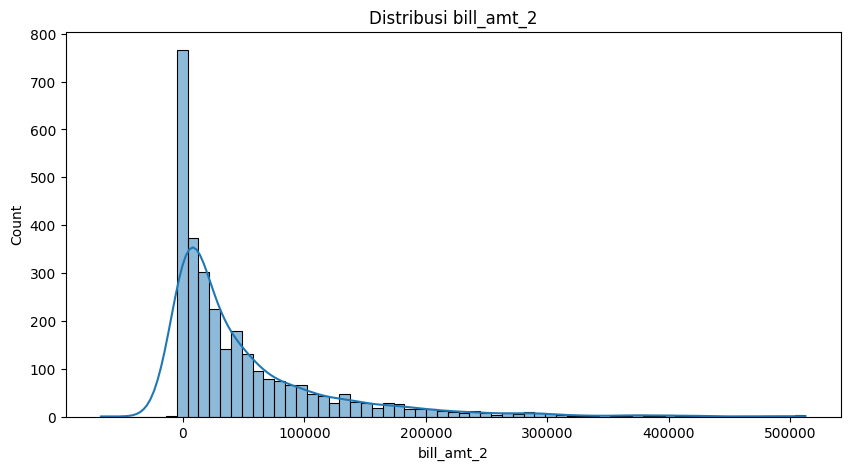

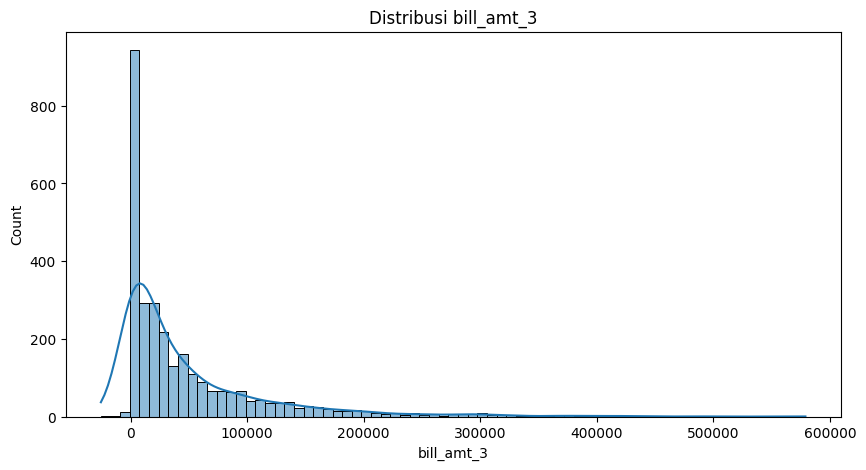

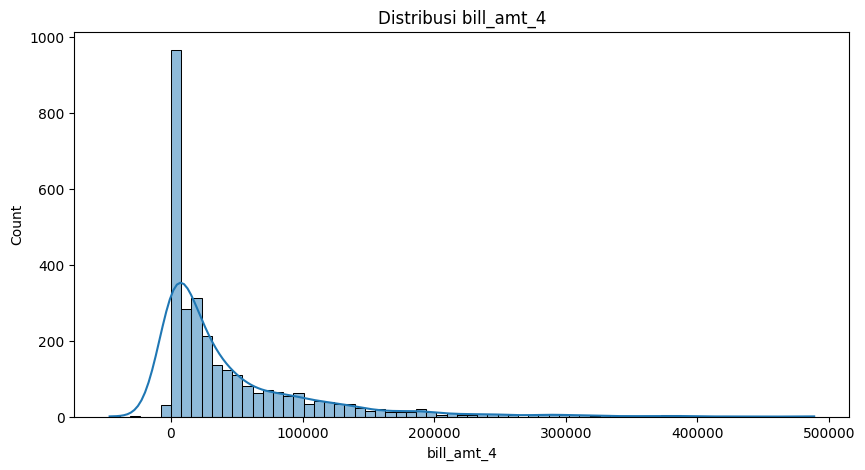

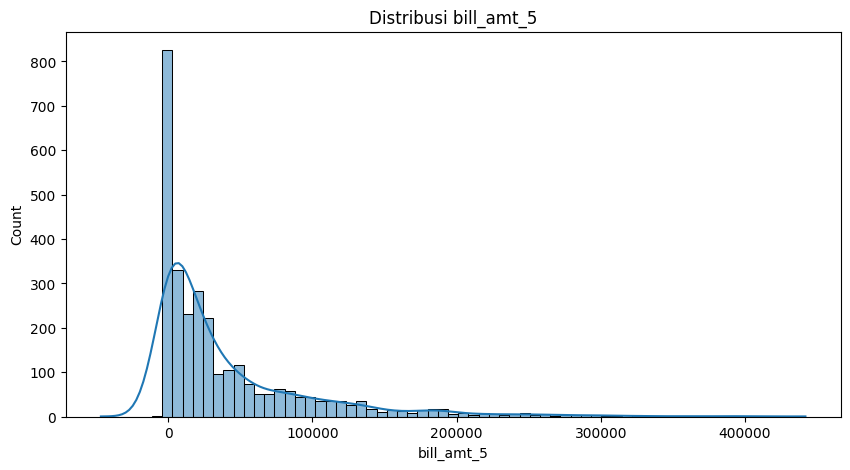

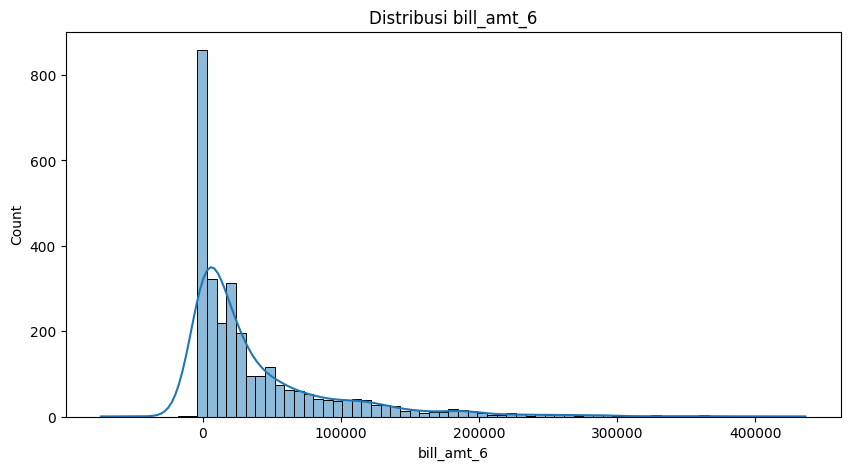

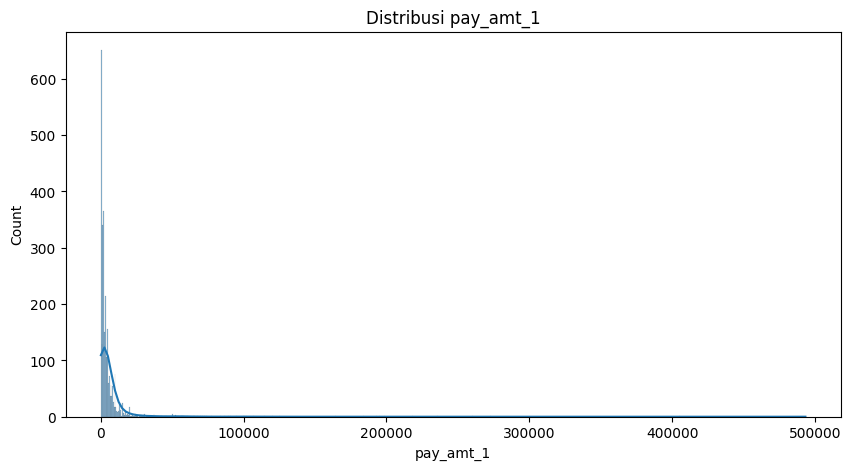

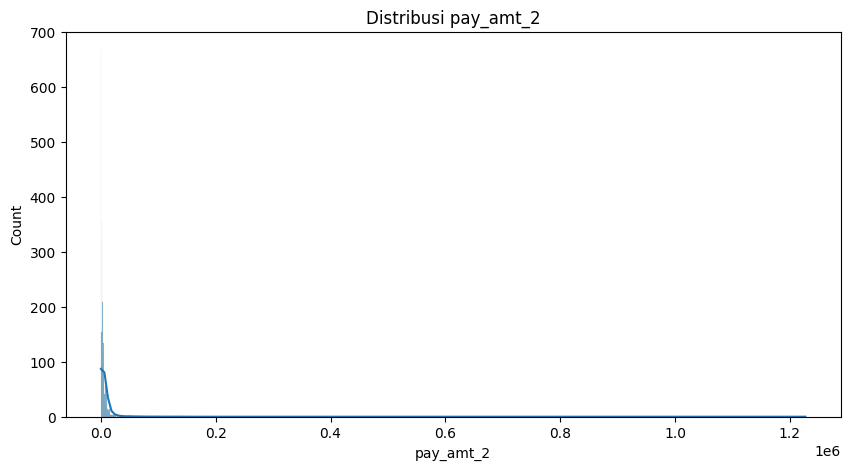

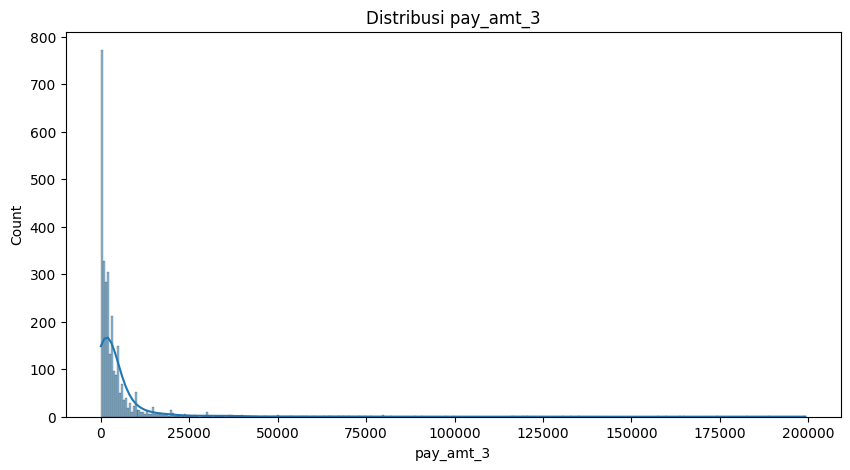

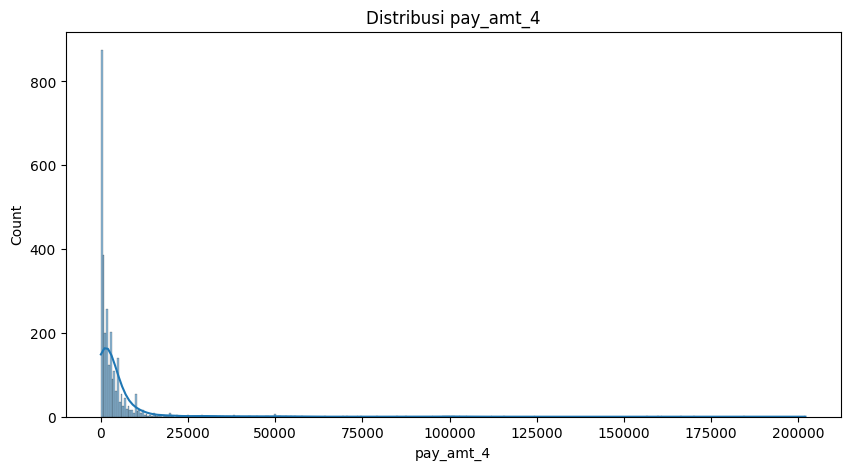

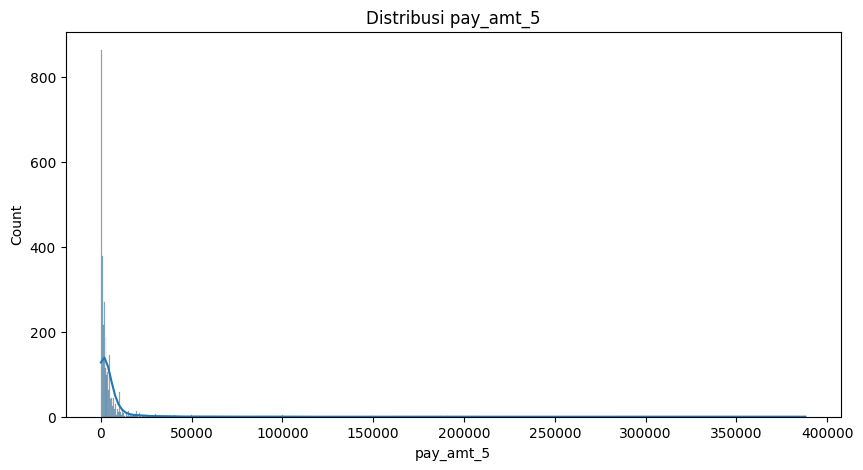

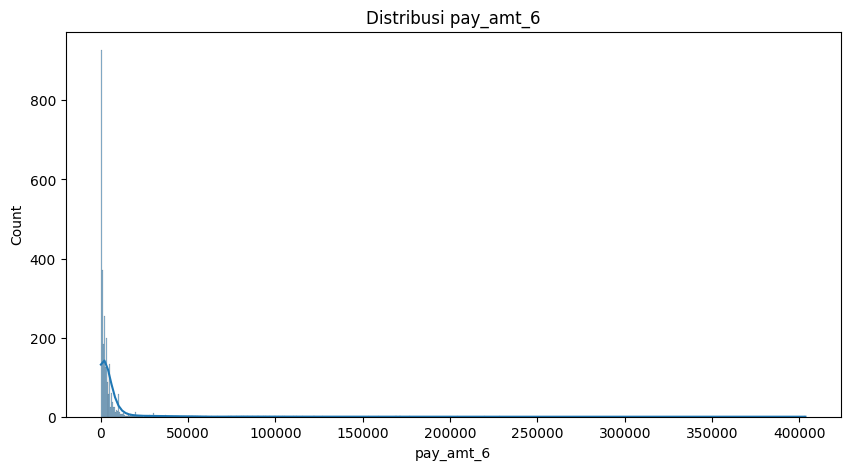

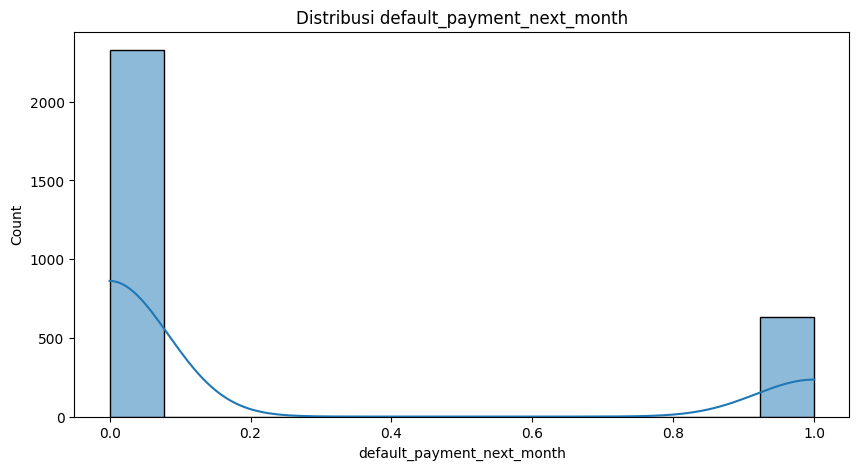

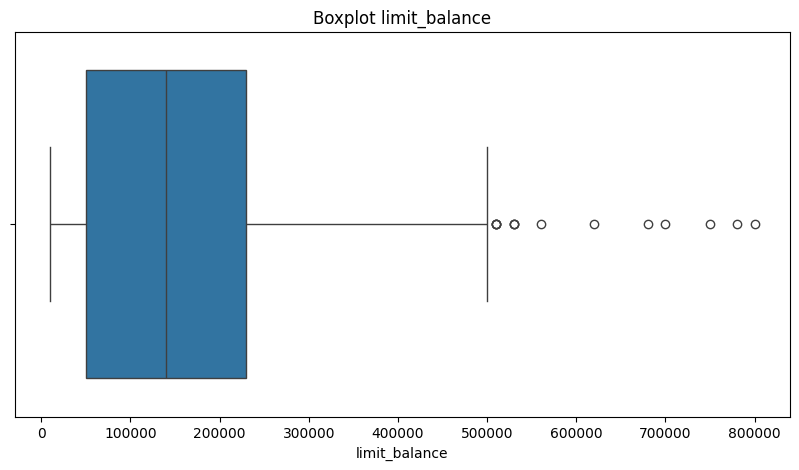

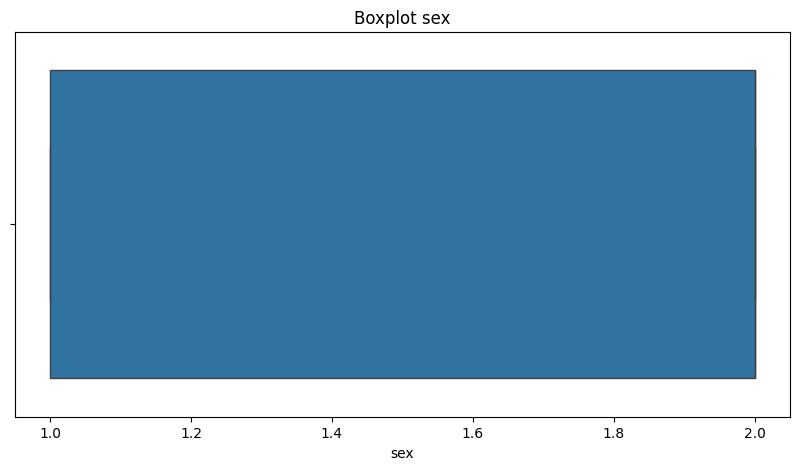

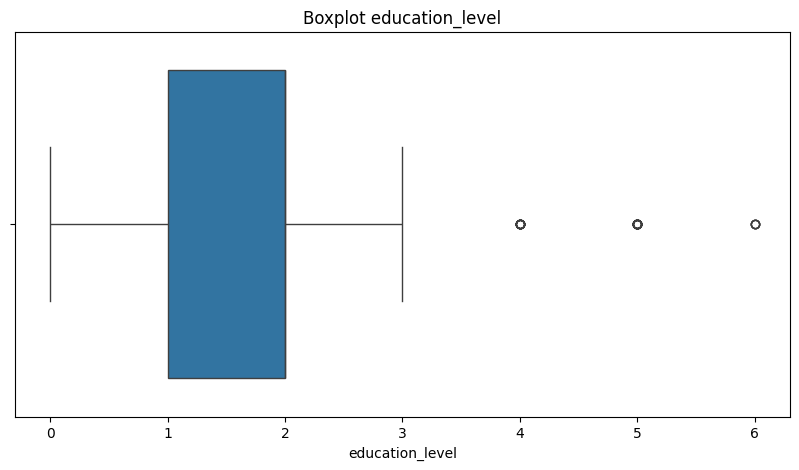

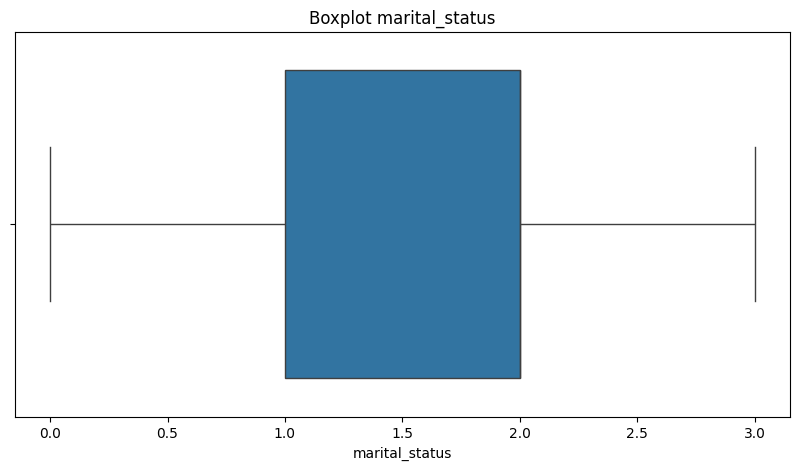

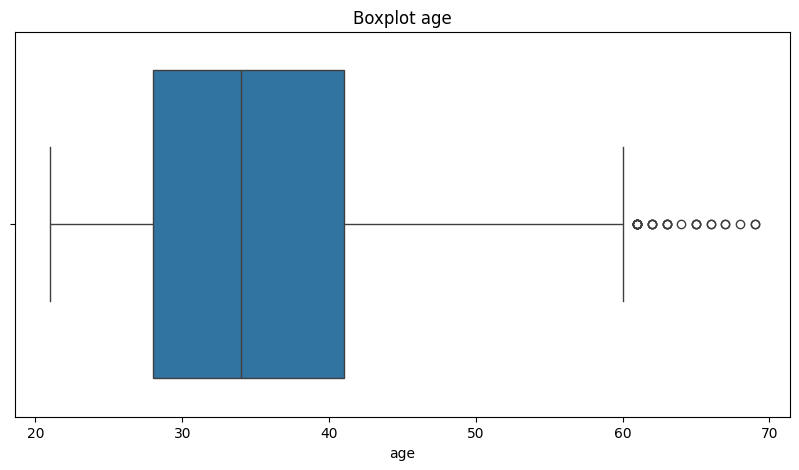

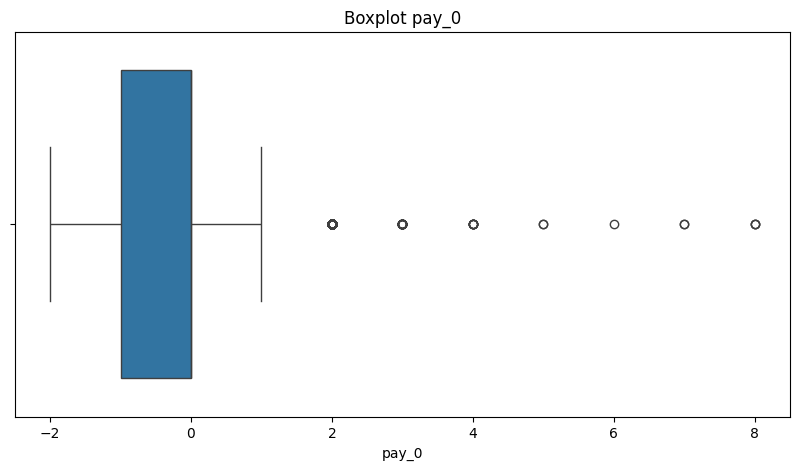

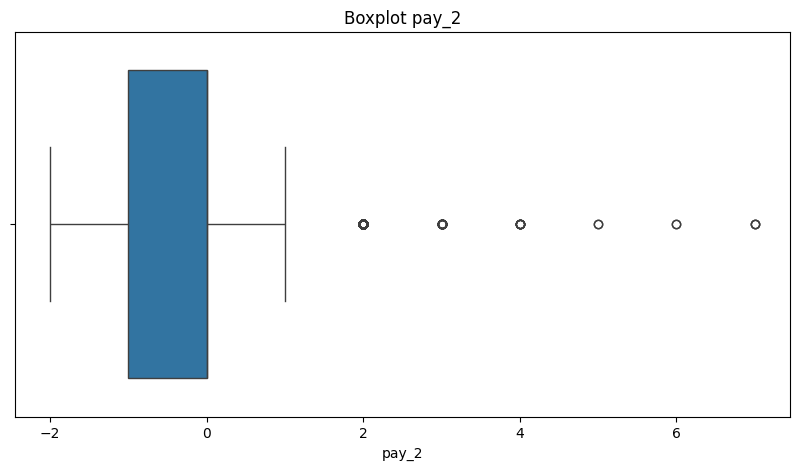

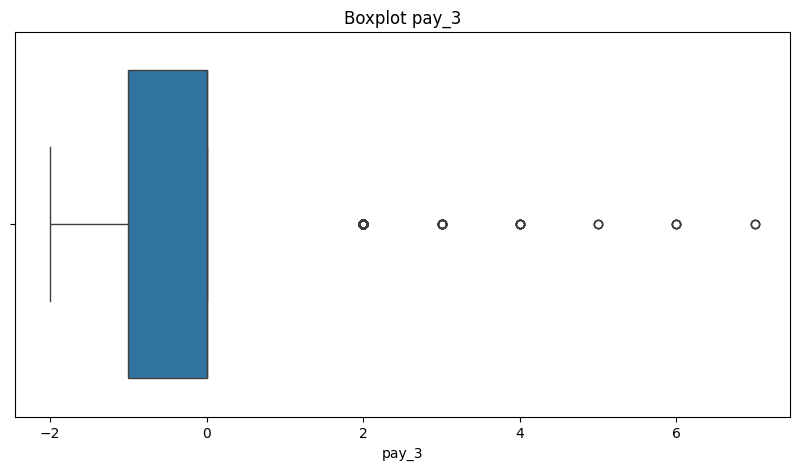

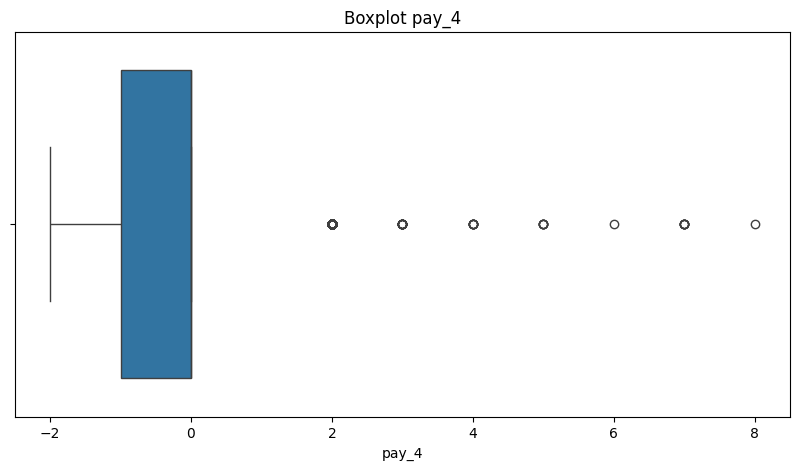

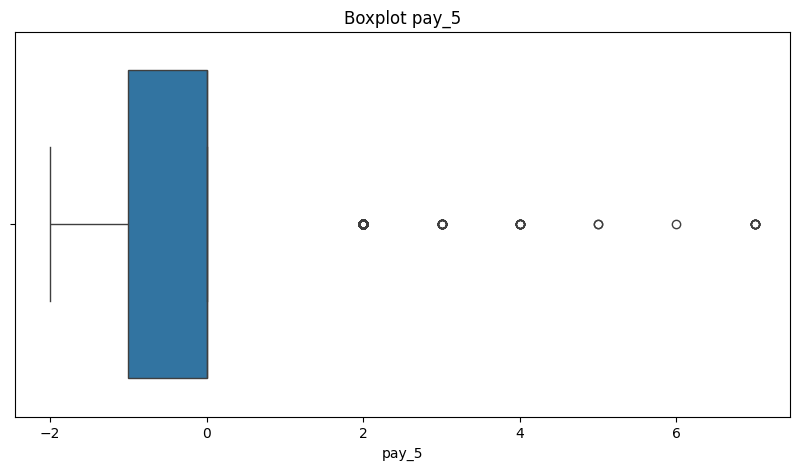

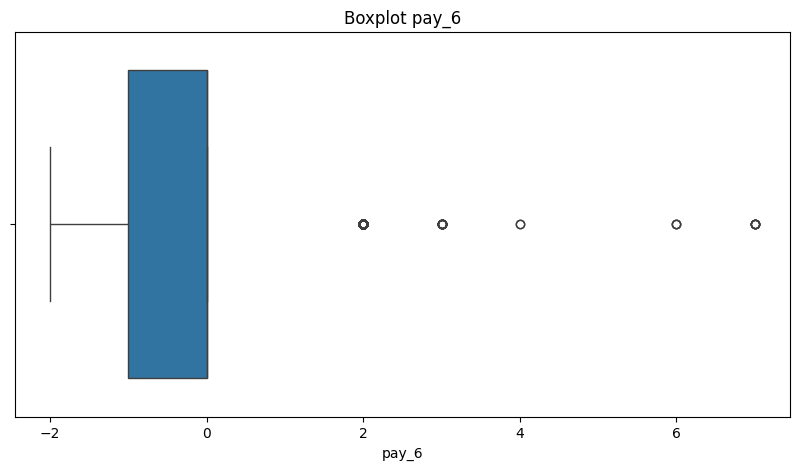

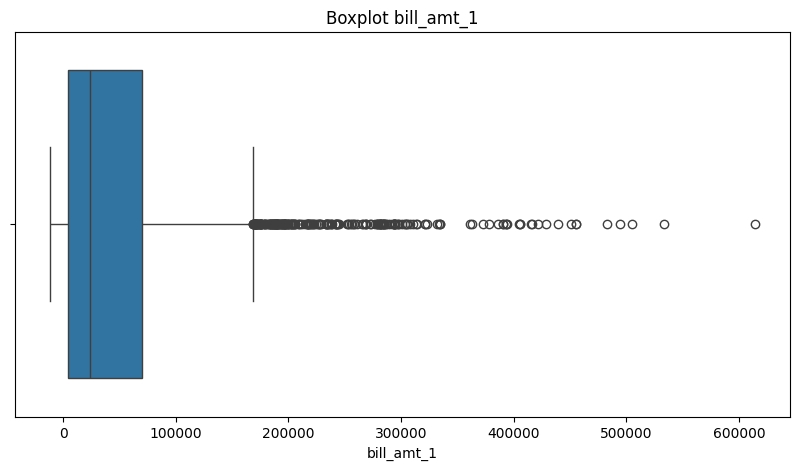

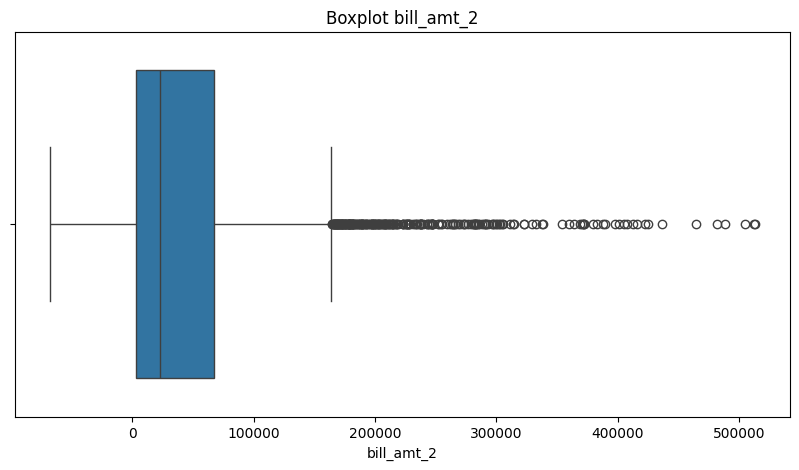

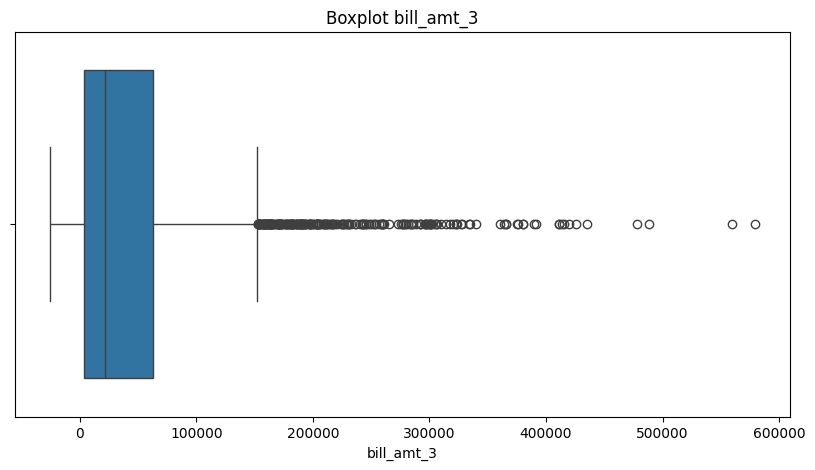

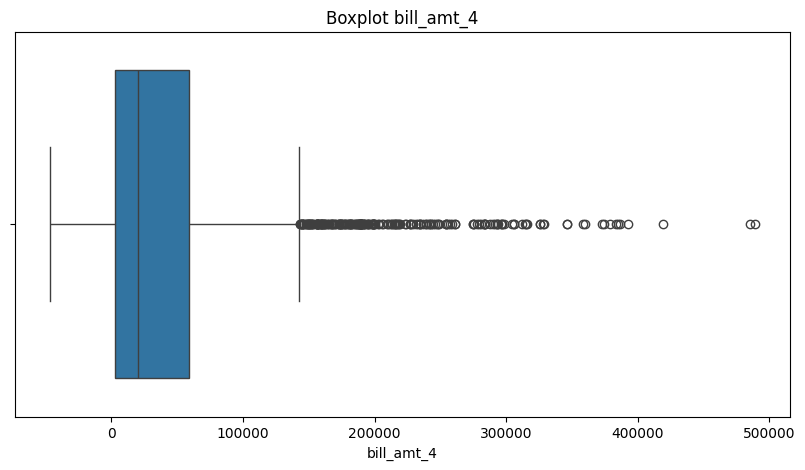

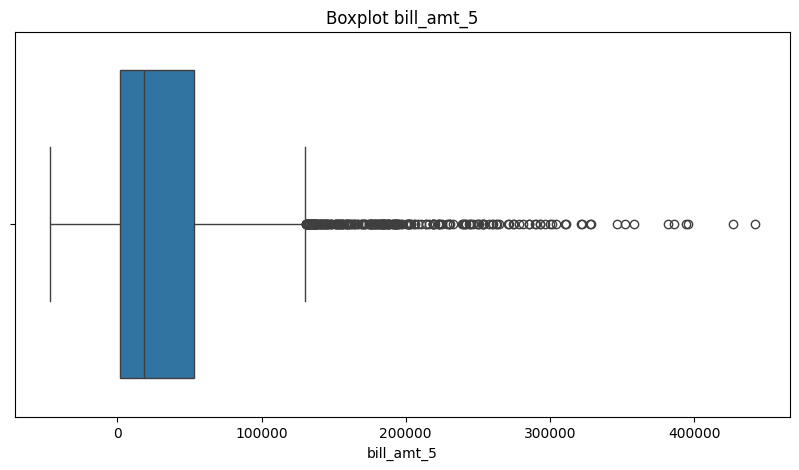

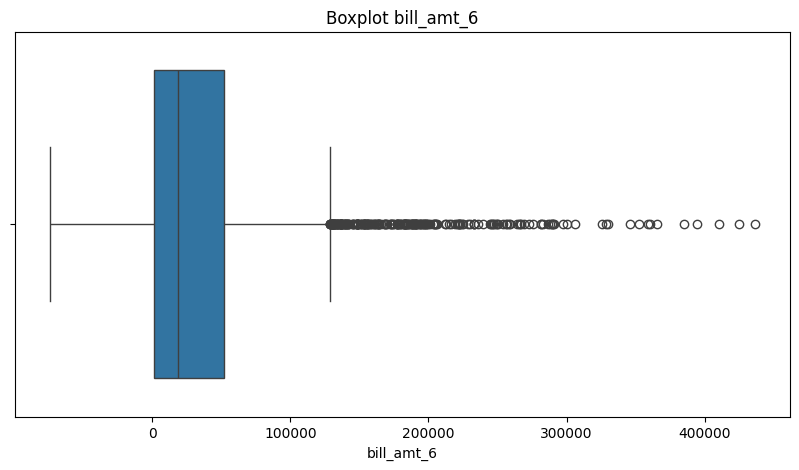

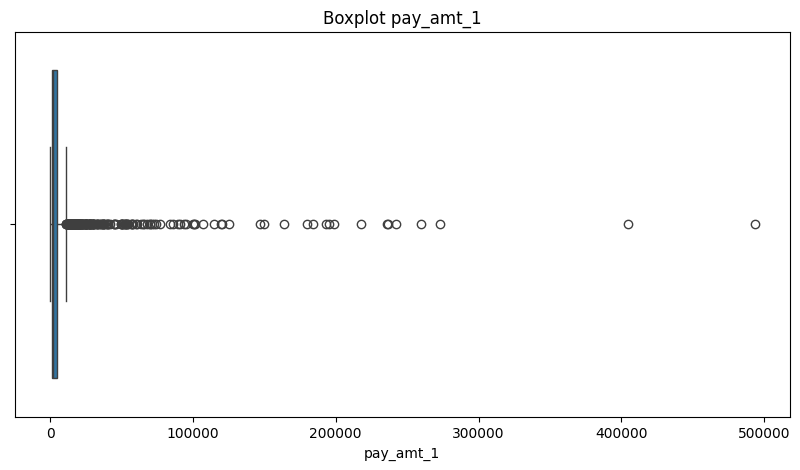

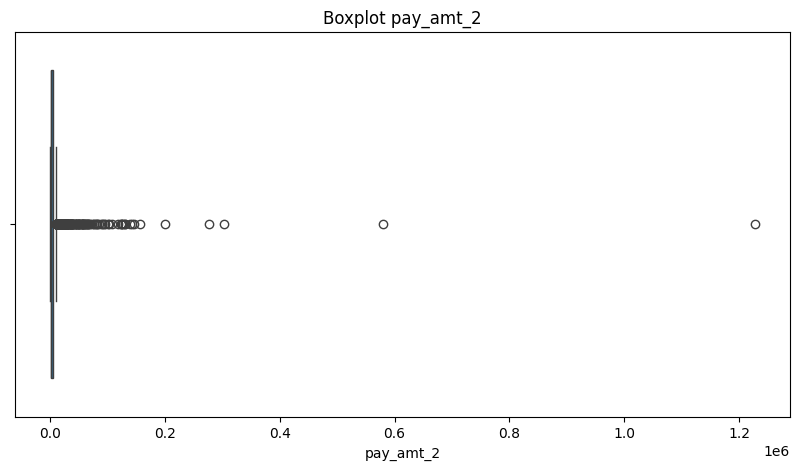

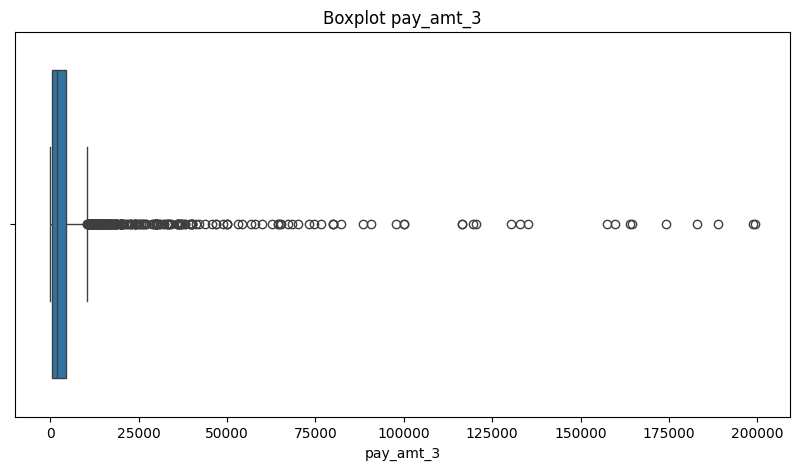

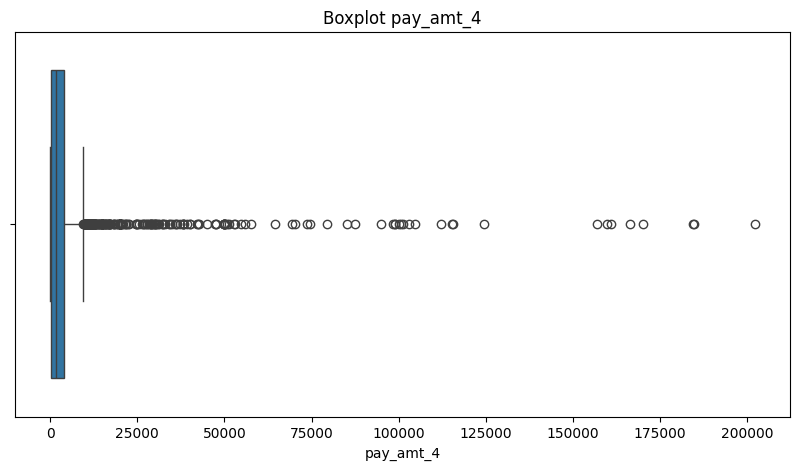

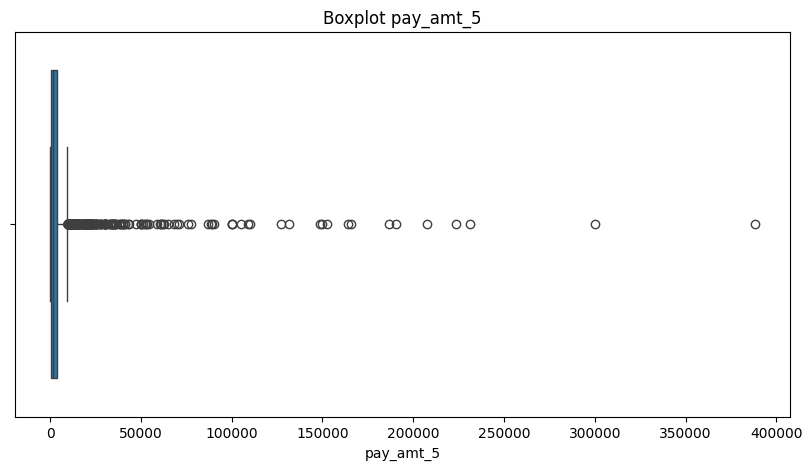

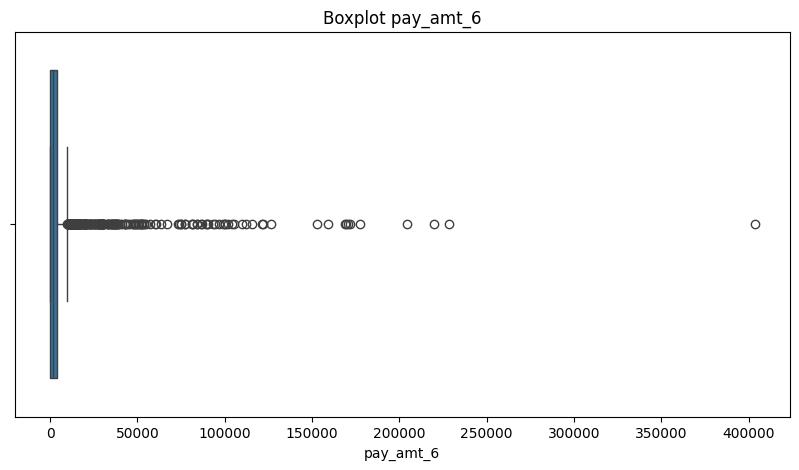

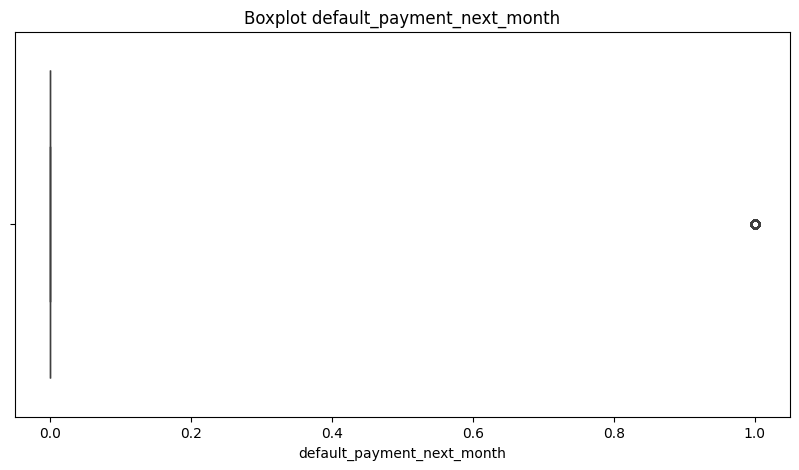

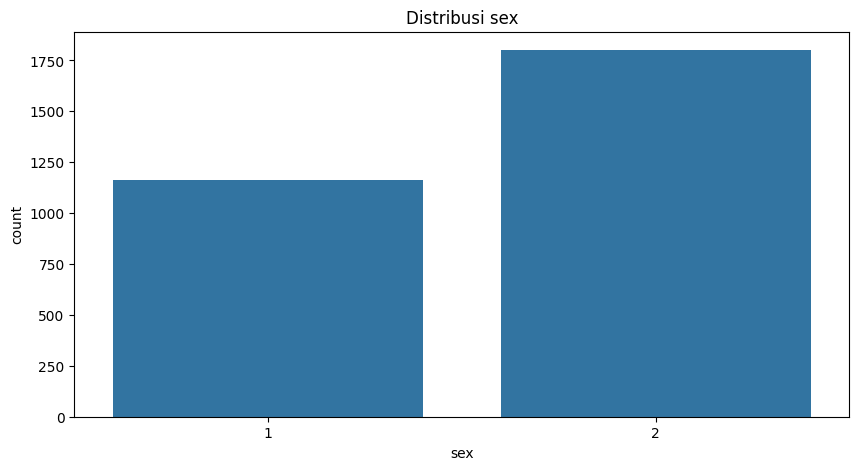

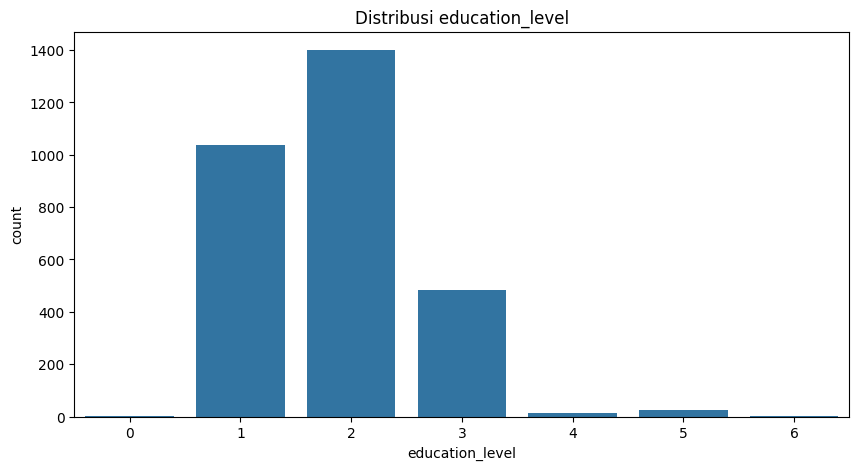

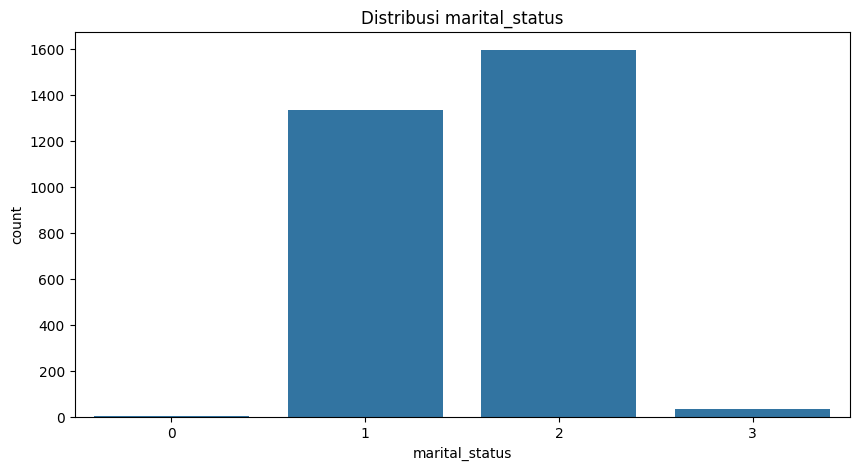

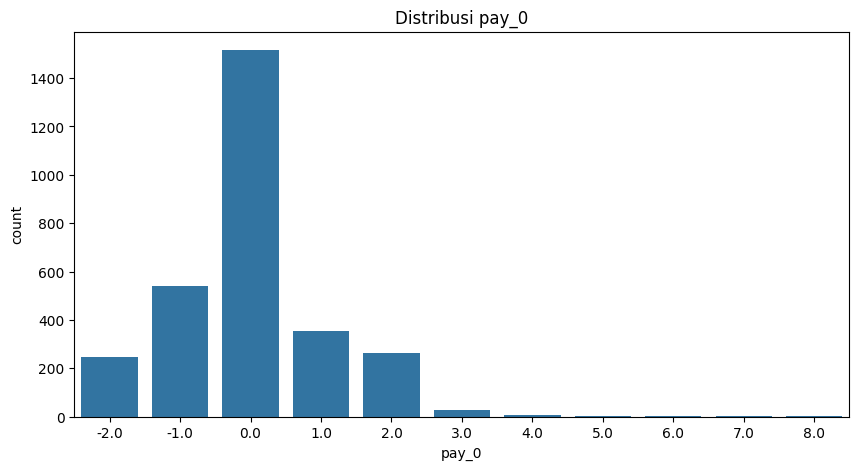

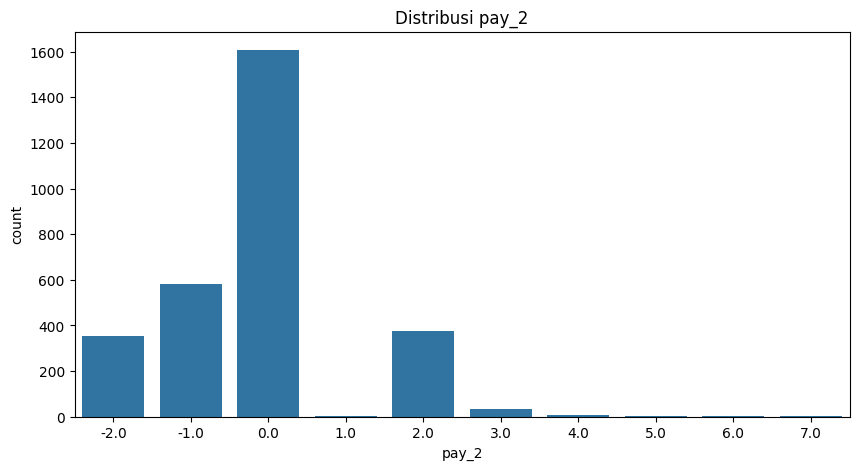

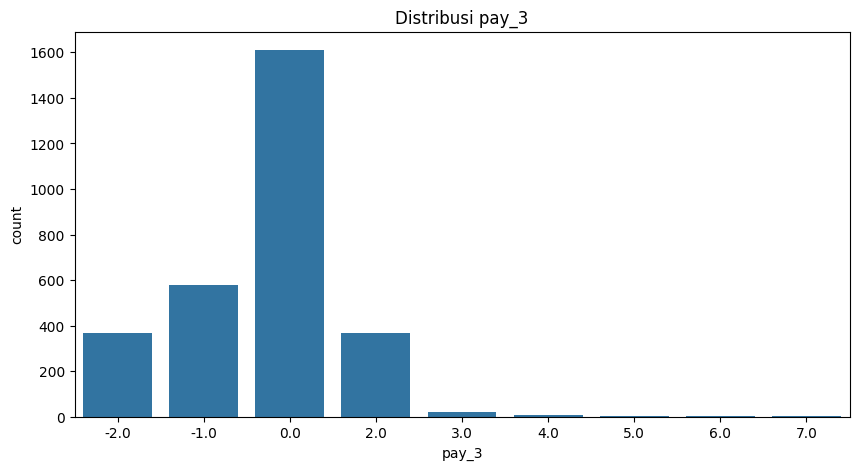

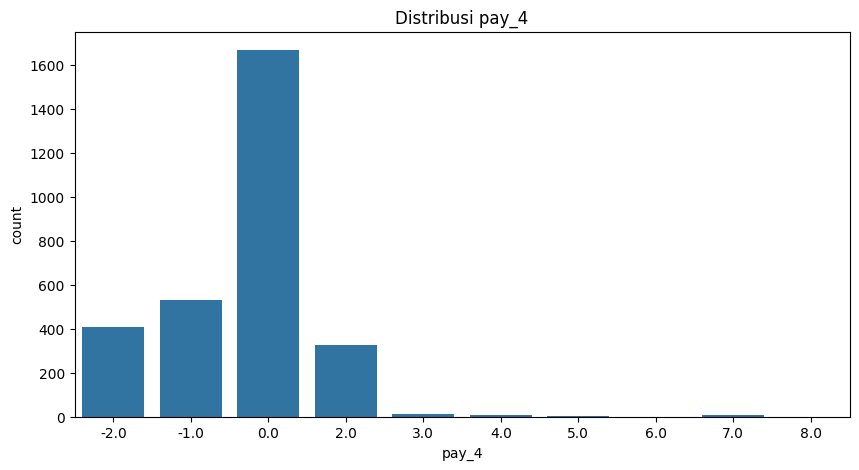

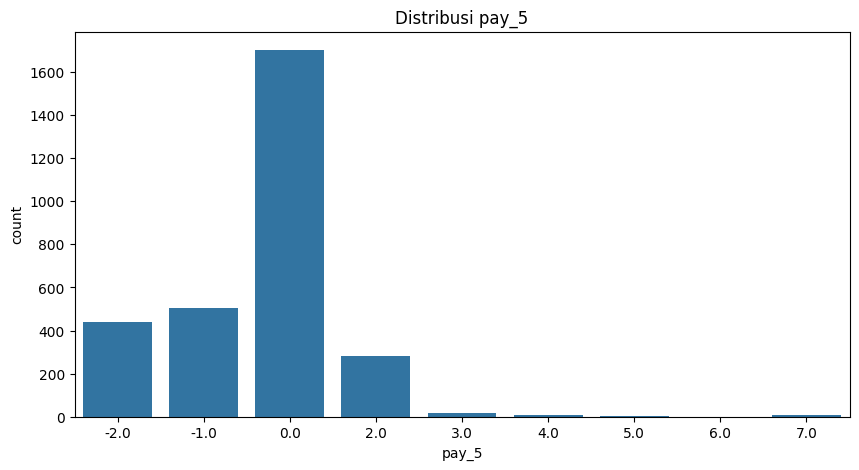

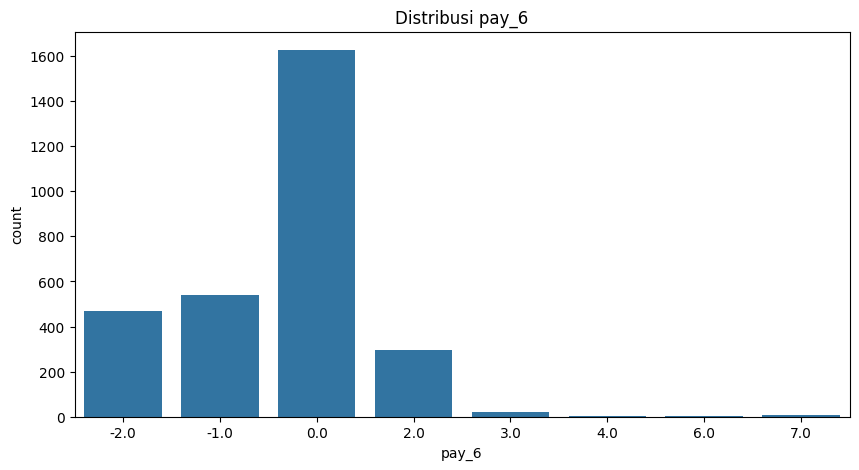

In [14]:
# Memisahkan kolom numerikal dan kategorikal
kolom_numerikal = dataset1.select_dtypes(include=['float64', 'int64']).columns.tolist()
kolom_kategorikal = ['sex', 'education_level', 'marital_status', 'pay_0', 
                     'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
  
# kolom kategorikal harus diidentifikasi secara manual jika tipenya bukan 'object'
print("Kolom Numerikal:", kolom_numerikal)
print("Kolom Kategorikal:", kolom_kategorikal)

# Visualisasi distribusi variabel numerikal
for kolom in kolom_numerikal:
    plt.figure(figsize=(10, 5))
    sns.histplot(dataset1[kolom], kde=True)
    plt.title(f'Distribusi {kolom}')
    plt.show()

# Visualisasi boxplot untuk deteksi outliers
for kolom in kolom_numerikal:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=dataset1[kolom])
    plt.title(f'Boxplot {kolom}')
    plt.show()

# Analisis variabel kategorikal dengan countplot
categorical_columns = ['sex', 'education_level', 'marital_status', 
                       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

for kolom in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=dataset1[kolom])
    plt.title(f'Distribusi {kolom}')
    plt.show()

- Melihat distribusi data disetiap kolom numerikal dan kategorikal
- Menampilkan outlier di kolom - kolom numerikal dan kategorikal
- Kolom numerik dan kategorikal rata berdistribusi miring ke kiri yang menandakan dataset memiliki kecenderungan ke nilai yang lebih tinggi, tetapi terdapat beberapa outlier yang signifikan di sisi nilai yang lebih rendah

**Menganalisa kolom kategorikal**

In [15]:
# Mengubah nama kolom
dataset1 = dataset1.rename(columns={'default_payment_next_month': 'default_payment'})                                  
dataset1.head(1)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1


[Text(0, 0, '2329'), Text(0, 0, '635')]

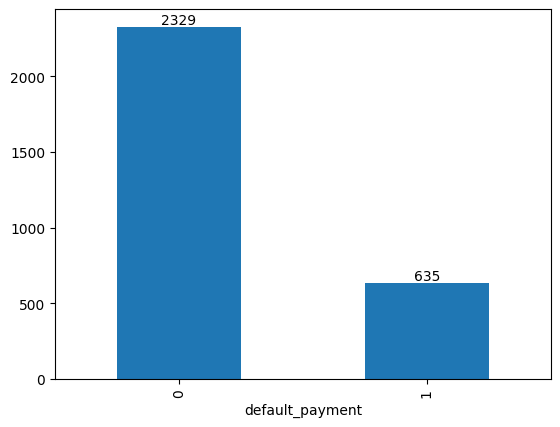

In [16]:
# Menampilkan bar plot
dfCount = dataset1['default_payment'].value_counts().sort_index().plot(kind='bar')
dfCount.bar_label(dfCount.containers[0])

Dapat dilihat bahwa dari 2964 data, terdapat 2329 yang tidak gagal bayar, dan 635 lainnya merupakan mereka yang gagal bayar. Menandakan data sangat bagus karena yang jumlah yang gagal bayar sedikit ini akan berdampak baik buat perusahaan.

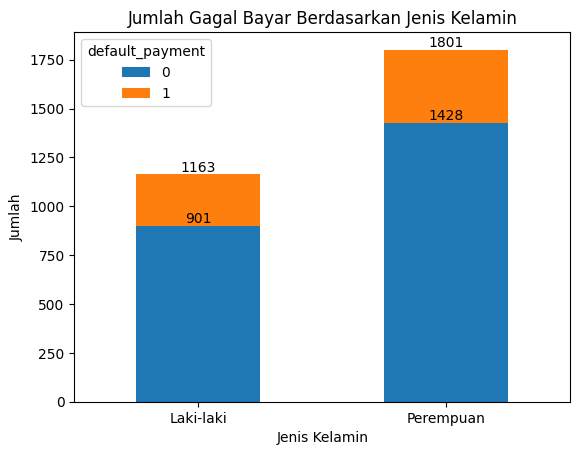

In [17]:
# Menghitung jumlah default pembayaran berdasarkan jenis kelamin
default_count_by_sex = dataset1.groupby(['sex', 'default_payment']).size().unstack()

# Membuat plot bar yang ditumpuk
fig, ax = plt.subplots()
default_count_by_sex.plot(kind='bar', stacked=True, ax=ax)

# Menambahkan label pada setiap plot
for container in ax.containers:
    ax.bar_label(container)

# Mengatur judul, label sumbu x, dan label sumbu y
ax.set_xlabel('Jenis Kelamin')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Gagal Bayar Berdasarkan Jenis Kelamin')
ax.set_xticklabels(['Laki-laki', 'Perempuan'], rotation=0)

# Menampilkan plot
plt.show()


 Terlihat jelas bahwa dari total 1163 pria, sebanyak 901 orang, atau sekitar 77.47%, tidak mengalami gagal bayar. Sebaliknya, sisanya sebesar 22.53% mengalami gagal bayar. Sementara itu, dari 1801 wanita, terdapat 1428 orang, atau sekitar 79.3%, yang tidak gagal bayar, dengan sisanya mengalami gagal bayar.

Perbandingan ini menunjukkan bahwa persentase pria dan wanita yang tidak mengalami gagal bayar relatif seimbang, dengan pria berada pada angka 77.47% dan wanita sedikit lebih tinggi pada 79.3%. Meski ada sedikit perbedaan, secara keseluruhan, kedua gender memiliki proporsi yang hampir sama dalam hal ketidakgagalan bayar.

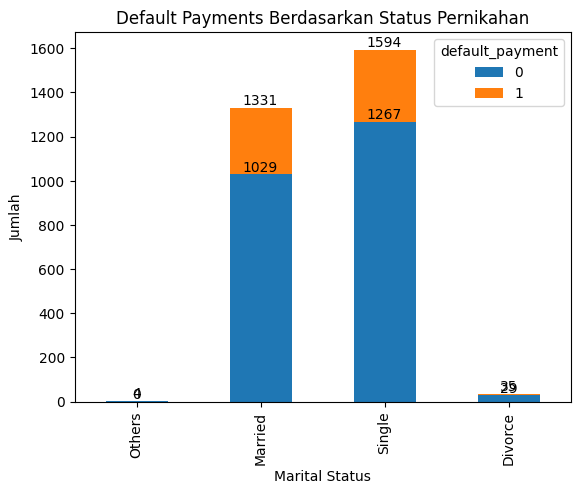

In [18]:
# Menghitung jumlah default payment berdasarkan status pernikahan
marital_status_counts = dataset1.groupby(['marital_status', 'default_payment']).size().unstack()

# Membuat stacked bar chart
fig, ax = plt.subplots()
marital_status_counts.plot(kind='bar', stacked=True, ax=ax)

# Menambahkan label pada tiap bar
for container in ax.containers:
    ax.bar_label(container)

# Mengatur label sumbu dan judul
ax.set_xlabel('Marital Status')
ax.set_ylabel('Jumlah')
ax.set_title('Default Payments Berdasarkan Status Pernikahan')
ax.set_xticklabels(['Others', 'Married', 'Single', 'Divorce'])

# Menampilkan plot
plt.show()


Dapat dilihat bahwa seluruh clients yang status pernikahannya tidak diketahui, yaitu sebanyak 4 dari 4 orang (100%), tidak mengalami gagal bayar. Sementara itu, dari kalangan clients yang berstatus menikah, terdapat 1029 dari 1331 orang (77,33%) yang tidak mengalami gagal bayar, dengan sisanya mengalami gagal bayar. Untuk clients yang belum menikah, sebanyak 1267 dari 1594 orang (79,48%) tidak mengalami gagal bayar, sedangkan sisanya mengalami gagal bayar. Adapun untuk clients yang berstatus bercerai, 29 dari 35 orang (82,86%) tidak mengalami gagal bayar, dengan sisanya mengalami gagal bayar.

Berdasarkan perbandingan status pernikahan di atas, dari kelompok yang status pernikahannya diketahui, persentase tertinggi untuk mereka yang tidak mengalami gagal bayar adalah dari kalangan yang berstatus cerai. Menyusul kemudian adalah mereka yang belum menikah, dan terakhir adalah mereka yang berstatus menikah.

**Split Train-Test Set**

- Tujuan split data untuk menentukan input dan outputnya. Dimana pada case ini untuk menentukan harga perjalanan sehingga y sebagai target/label dan x sebagai feature.
- Digunakannya test_size 20% untuk dialokasikan sebagai data pengujian.

Split antara x (features) dan y (target)

In [19]:
# Memisahkan antara kolom x dan y 
X = dataset1.drop(['default_payment'], axis = 1)
y = dataset1['default_payment']

Tujuan dipisahnya kolom **default_payment** karena kita tidak ingin kolom y/target ikut dalam pemisahan kolom - kolom features karena kalau tidak dipisahkan kolom kita tidak bisa tahu kolom/features apa saja yang mempengaruhi target.

In [20]:
# Memeriksa nilai X
X.head(5)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0


Dari informasi diatas kolom X hanya berisi feature - feature yang nantinya akan mempengaruhi kolom y

**Feature Selection**

Feature selection merupakan proses krusial dalam pemodelan untuk menentukan feature yang paling relevan. Hal ini dilakukan dengan berbagai metode, seperti personal judgement, pengetahuan domain dan bisnis, evaluasi korelasi, serta VIF (untuk model linear). Pada tahap ini, fokus utama adalah pada nilai korelasi antara setiap feature dengan target (`default_payment`). Feature yang memiliki korelasi rendah atau tidak signifikan dengan target akan dihapus. Analisis ini umumnya dilakukan dalam tahap Exploratory Data Analysis (EDA), di mana korelasi antar variabel dievaluasi secara menyeluruh.

In [21]:
# Menghapus kolom yang tidak berkolerasi
X = X.drop(['age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
            'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'marital_status', 'sex'],axis=1)
print('Jumlah dataset :', X.shape)

Jumlah dataset : (2964, 8)


Dari data diatas kita sudah berhasil menghapus 15 kolom/features yang tidak berpengaruh terhadap default_payment. Ini bertujuan untuk memastikkan yang kita ingin gunakan hanya kolom/features yang berkolerasi kuat dengan defaul_payment dan ini akan memudahkan kita untuk melakukan proses selanjutnya. Alasan kita menghapus features/kolom diatas adalah kita sudah melakukan uji statistik inferensial yaitu uji korelasi antar features dan target. 

In [22]:
# Membuat function untuk menghitung nilai VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

print(calc_vif(X))

         variables       VIF
0    limit_balance  2.076640
1  education_level  1.940776
2            pay_0  1.867808
3            pay_2  3.134799
4            pay_3  3.410222
5            pay_4  4.081393
6            pay_5  4.811420
7            pay_6  3.221104


Berdasarkan hasil yang ditampilkan, terlihat bahwa VIF memiliki nilai di bawah 10, yang menunjukkan tidak adanya isu multikolinearitas. Sehingga, setelah tahap seleksi fitur, sekarang terdapat 8 fitur yang akan digunakan dalam pembuatan model. Alasan lain selain melihat kolerasi menggunakan heatmap(spearman) memilih feature/kolom diatas:

- limit_balance :

Variabel ini menggambarkan batas kredit yang tersedia untuk pemegang kartu.
Pengaruh positif terhadap default payment: Semakin tinggi batas kreditnya, semakin besar kemungkinan untuk melakukan default payment.
Alasan: Pemegang kartu dengan batas kredit yang tinggi mungkin lebih cenderung untuk mengambil risiko lebih besar dalam pengelolaan kreditnya atau memiliki tanggung jawab finansial yang lebih kompleks.

- education_level :

Variabel ini mungkin mengacu pada tingkat pendidikan pemegang kartu.
Pengaruh positif terhadap default payment: Tingkat pendidikan yang lebih rendah dapat berkorelasi dengan tingkat default yang lebih tinggi.
Alasan: Pendidikan yang lebih rendah sering kali terkait dengan pemahaman yang lebih rendah tentang manajemen keuangan atau keterbatasan dalam akses informasi terkait pengelolaan kredit.

- pay_0 :

Variabel ini menunjukkan status pembayaran pada bulan sebelumnya.
Pengaruh positif terhadap default payment: Jika status pembayaran sebelumnya menunjukkan keterlambatan, kemungkinan besar akan ada default payment.
Alasan: Pola keterlambatan pembayaran sebelumnya sering kali menjadi indikator kuat untuk perilaku pembayaran di masa depan. Keterlambatan pembayaran sebelumnya dapat menunjukkan kesulitan keuangan atau kurangnya disiplin pembayaran.

- pay_2 :

Variabel ini menunjukkan status pembayaran dua bulan sebelumnya.
Pengaruh lebih besar daripada pay_0: Keterlambatan pembayaran yang lebih lama dua bulan sebelumnya dapat lebih kuat memprediksi default payment.
Alasan: Keterlambatan pembayaran yang berkelanjutan menunjukkan masalah keuangan yang lebih serius atau pola perilaku yang tidak stabil dalam manajemen kredit.

- pay_3 :

Variabel ini menunjukkan status pembayaran tiga bulan sebelumnya.
Pengaruh lebih besar lagi: Keterlambatan yang berlanjut hingga tiga bulan sebelumnya sangat mungkin menyebabkan default payment.
Alasan: Pola keterlambatan yang semakin panjang menunjukkan kesulitan finansial yang mendalam atau ketidakmampuan untuk mengelola kredit dengan baik.

- pay_4 :

Variabel ini menunjukkan status pembayaran empat bulan sebelumnya.
Pengaruh yang lebih besar lagi: Keterlambatan yang berlanjut hingga empat bulan sebelumnya secara signifikan meningkatkan risiko default payment.
Alasan: Keterlambatan yang terus berlanjut menunjukkan pola pembayaran yang tidak stabil dan mungkin indikasi dari masalah keuangan yang serius.

- pay_5 :

Variabel ini menunjukkan status pembayaran lima bulan sebelumnya.
Pengaruh paling besar: Keterlambatan yang terus menerus hingga lima bulan sebelumnya memiliki pengaruh paling signifikan terhadap kemungkinan default payment.
Alasan: Pada titik ini, pola keterlambatan yang berlanjut menunjukkan adanya masalah finansial yang mendalam dan sangat besar kemungkinan akan mengarah pada default payment.

In [23]:
# Splitting antara train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (2371, 8)
Test Size:  (593, 8)


Dataset sudah dibagi menjadi data train dan test:
-   Data train sebanyak 2371 baris dan 8 fitur/kolom.
-   Data test sebanyak 593 baris dan 8 fitur/kolom.

**Kesimpulan EDA**
1. Fitur dengan kardinalitas tinggi, yang memiliki banyak nilai unik, termasuk **bill_amt_1**, **bill_amt_2**, dan **bill_amt_3**.
2. Fitur dengan kardinalitas rendah seperti **education_level**, **marital_status**, **sex**, dan **default_payment_next_month** adalah kolom kategorikal.
3. Setelah menghapus 1 data duplikat, jumlah baris berkurang dari 2965 menjadi 2964 untuk memudahkan proses berikutnya.
4. Korelasi antara kolom numerik di dataset dianalisis dengan matriks korelasi yang berkisar antara -1 dan 1. Korelasi positif sempurna (1) berarti kedua variabel meningkat bersama, sementara korelasi negatif sempurna (-1) berarti ketika satu variabel meningkat, yang lain menurun. Korelasi nol (0) menunjukkan tidak ada hubungan linier.
5. Heatmap menunjukkan korelasi positif kuat antara `bill_amt_1` hingga `bill_amt_6`, serta `pay_2` hingga `pay_6`. `Limit_balance` menunjukkan korelasi sedang dengan beberapa variabel pembayaran dan jumlah tagihan, sementara `age` memiliki korelasi sangat rendah dengan sebagian besar variabel lainnya.
6. Hanya status pembayaran bulanan (`pay_1` hingga `pay_6`) dan tingkat pendidikan (`education_level`) yang terhubung signifikan dengan keputusan gagal bayar. `Limit_balance` juga terkait dengan `default_payment`.
7. Dari 2964 data, 2329 tidak gagal bayar dan 635 gagal bayar, menunjukkan distribusi data yang baik untuk perusahaan.
8. Dari 1163 pria, 77.47% tidak gagal bayar, dan dari 1801 wanita, 79.3% tidak gagal bayar, menunjukkan keseimbangan relatif antara gender.
9. Semua klien dengan status pernikahan tidak diketahui (4 orang) tidak gagal bayar. Dari klien yang menikah, 77.33% tidak gagal bayar, dari yang belum menikah 79.48%, dan dari yang bercerai 82.86% tidak gagal bayar.
10. Persentase tertinggi ketidakgagalan bayar adalah dari klien yang bercerai, diikuti yang belum menikah, dan terakhir yang menikah.
11. Split Train-Test Set:
    - Tujuannya adalah untuk menentukan input (X) dan output (Y) untuk memprediksi harga perjalanan, dengan test_size 20% sebagai data pengujian.
    - Kolom **default_payment** dipisahkan untuk mengetahui kolom/features yang mempengaruhi target tanpa mempengaruhi proses pemisahan.
12. Feature Selection:
    - Proses ini penting untuk menentukan feature yang paling relevan dengan menggunakan metode seperti penilaian pribadi, pengetahuan domain dan bisnis, evaluasi korelasi, dan VIF untuk model linear.
    - Feature dengan korelasi rendah atau tidak signifikan dengan target dihapus.
    - Dari analisis, 15 kolom/features yang tidak berpengaruh terhadap default_payment dihapus, menyisakan 8 fitur untuk pemodelan.
    - Hasil VIF di bawah 10 menunjukkan tidak adanya isu multikolinearitas.

# **vi. Feature Engineering** 

**Outlier Handling**

In [24]:
# Membuat variabel kolom numerik
num_column = X_train.columns[X_train.dtypes != object]

In [25]:
# Membuat plot untuk melihat outlier setiap feature
def diagnostic_plots(dataset1, variable):
    # Define figure size
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(dataset1[variable], bins=30, color='pink')
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=dataset1[variable], color='grey')
    plt.title('Boxplot')

    plt.show()

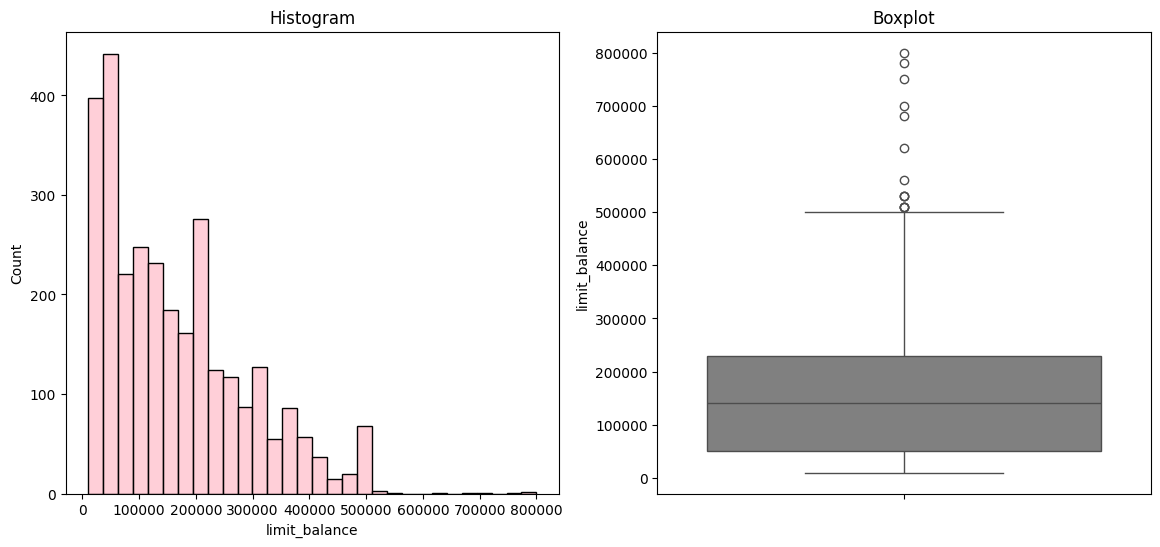

<Figure size 1400x600 with 0 Axes>

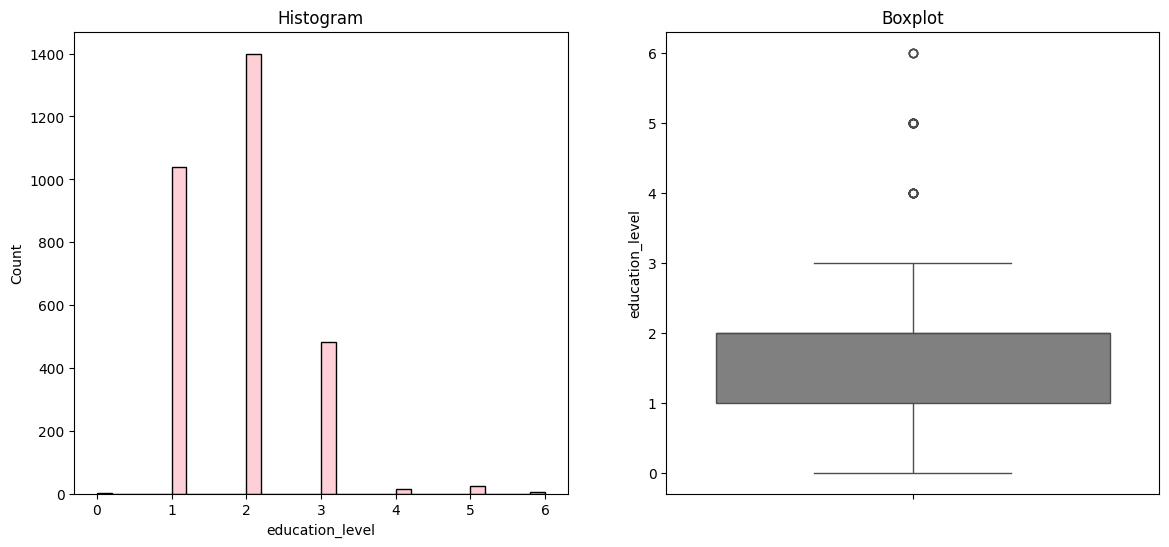

<Figure size 1400x600 with 0 Axes>

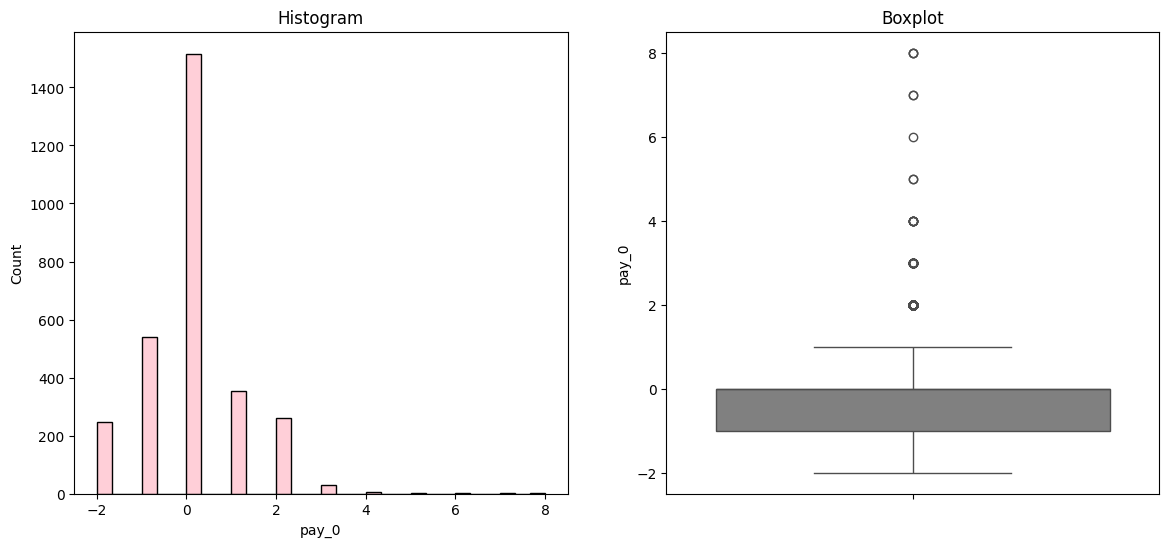

<Figure size 1400x600 with 0 Axes>

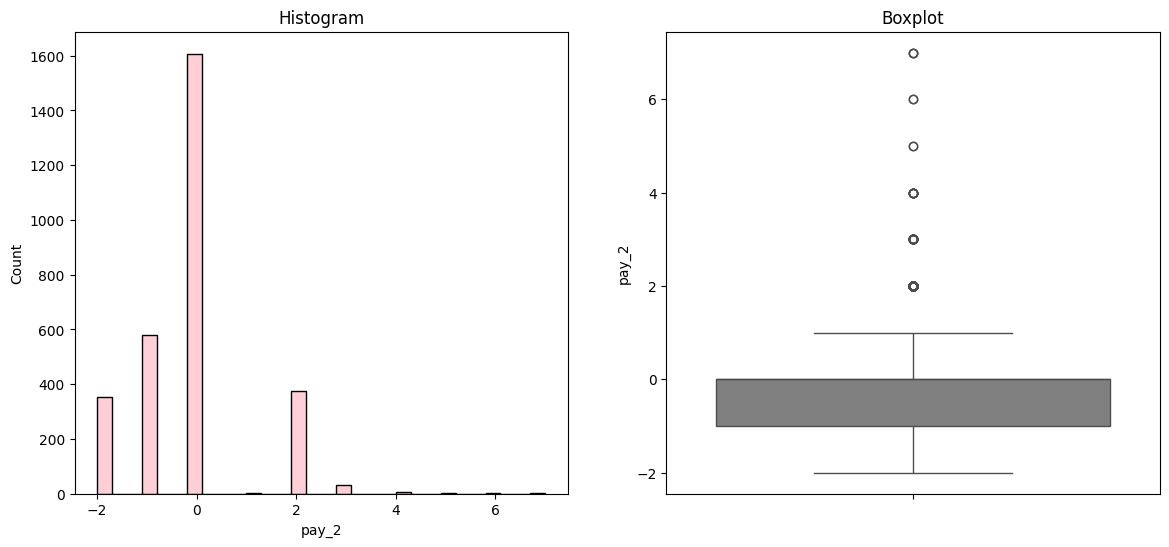

<Figure size 1400x600 with 0 Axes>

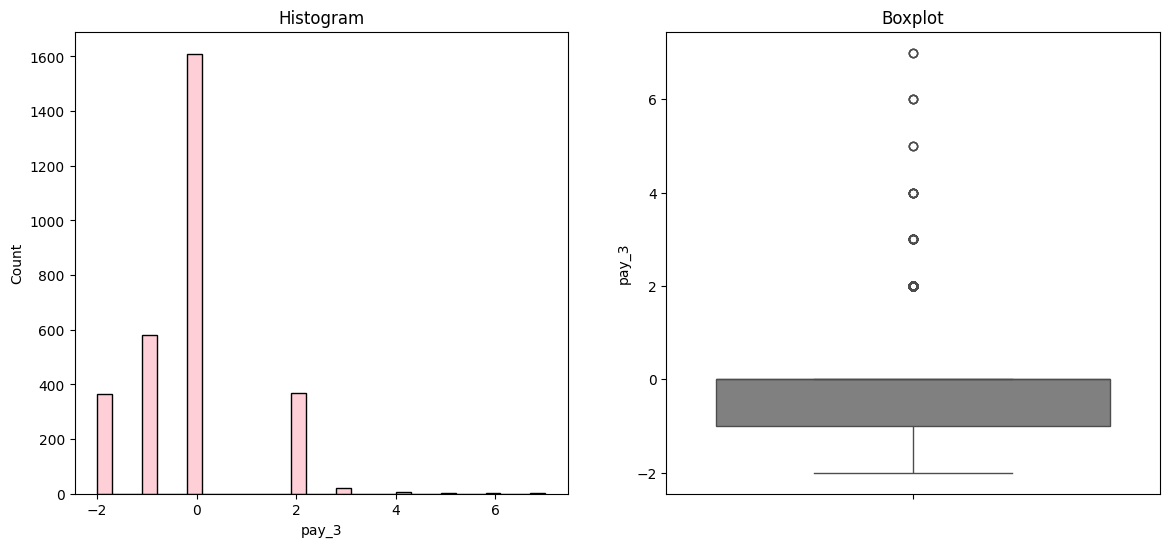

<Figure size 1400x600 with 0 Axes>

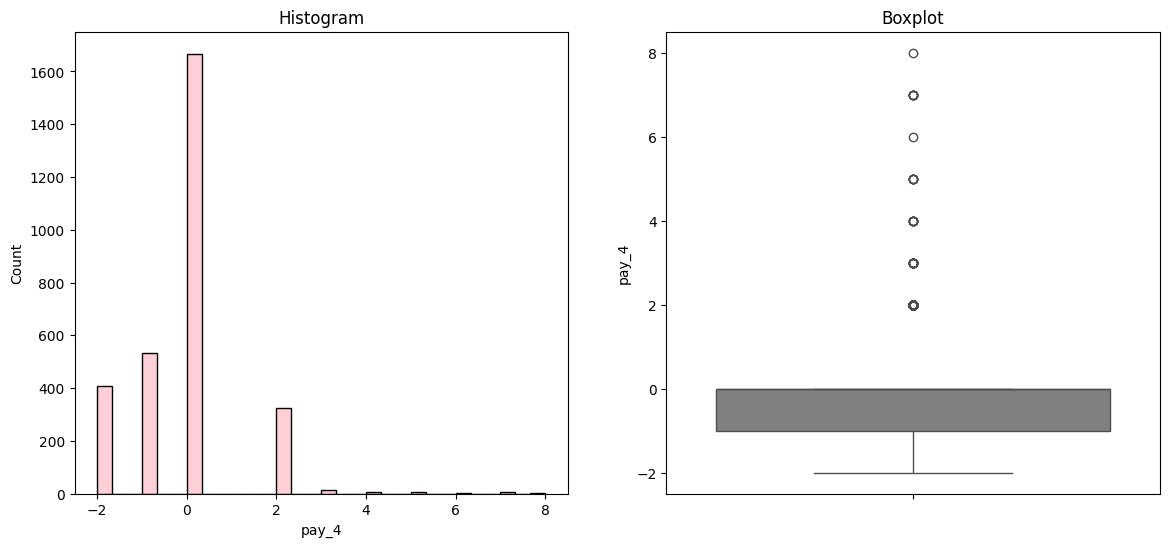

<Figure size 1400x600 with 0 Axes>

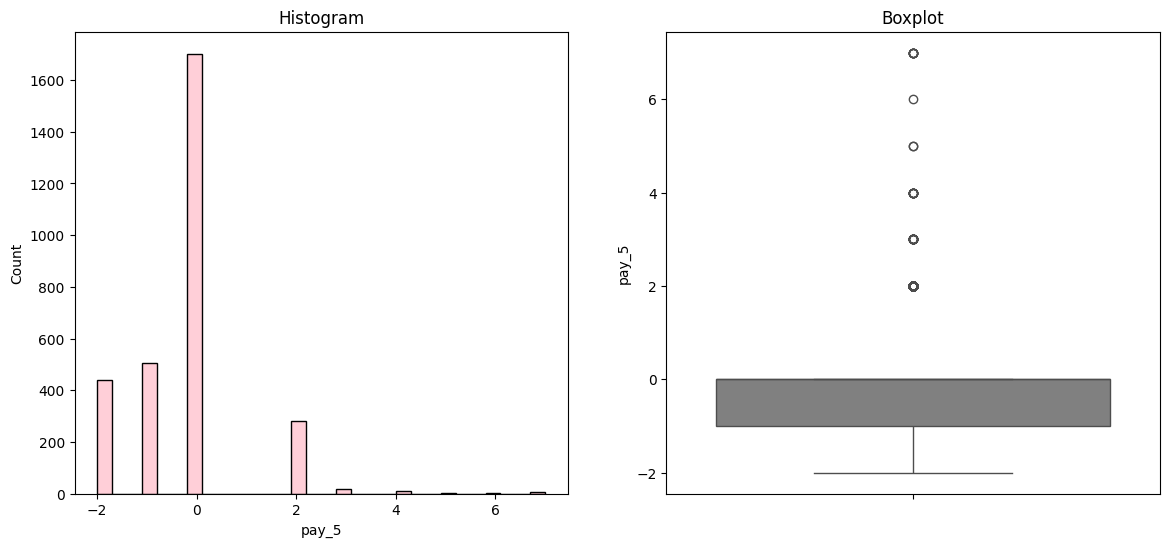

<Figure size 1400x600 with 0 Axes>

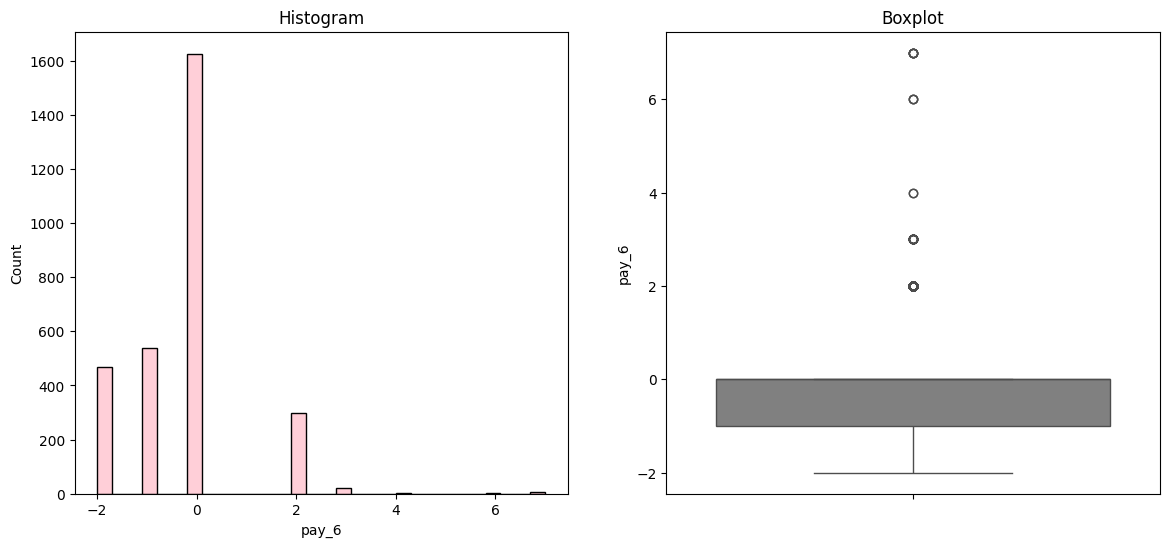

<Figure size 1400x600 with 0 Axes>

In [26]:
for kolom in num_column:
    # Panggil fungsi diagnostic_plots untuk membuat boxplot dan histogram untuk kolom saat ini
    diagnostic_plots(dataset1, kolom)
    
    # Define figure size
    plt.figure(figsize=(14,6))

Dari gambar di atas, kami telah mengidentifikasi kolom-kolom yang mengandung outlier dari yang sangat ekstrem hingga tidak ada outlier sama sekali. Langkah-langkah yang dilakukan meliputi:

1. Menghitung nilai skewness pada setiap kolom data numerik untuk mengidentifikasi distribusi data (normal atau miring).
2. Distribusi normal ditandai dengan skewness mendekati nol, sementara distribusi miring memiliki skewness yang signifikan (positif atau negatif).
3. Kolom-kolom dengan distribusi normal tidak memerlukan penanganan khusus, sementara kolom-kolom dengan distribusi miring memerlukan uji statistik lebih lanjut untuk menentukan tindakan yang diperlukan.

Ini adalah langkah-langkah penting untuk mengelola outlier dalam data numerik.

In [27]:
# Outlier handling pada feature, membuat pipeline dan scalling numerik menggunakkan RobustScaler()
numCol = ['limit_balance']
num_pipeline = make_pipeline(Winsorizer(capping_method='iqr', tail='right', fold=1.5),
                             RobustScaler())                                             

# Feature numerik akan discale
prep = ColumnTransformer([
    ('numerik', num_pipeline, numCol)],                                     
    remainder='passthrough')       

Metode handling outlier **censoring** berikut alasannya :
- Dipilihnya metode capping karena nilai-nilai outlier dipotong sehingga tidak melebihi batas tersebut. Dengan kata lain, tidak menghilangkan data pada dataset tetapi hanya memotong yang melebihi batas.

memiliki skewed distribution yang tidak bisa dihitung menggunakan metode IQR karena kolom-kolom tersebut memiliki variansi yang rendah. Oleh karena itu, dilakukan capping menggunakan metode iqr. Alasan memilih metode ini adalah :
- Metode ini mudah diimplementasikan dan cepat dalam penghitungan, sehingga sering digunakan dalam eksplorasi data awal dan pembersihan data

**Kesimpulan Feature Engineering**

Beberapa fitur dalam dataset memiliki kardinalitas tinggi seperti `bill_amt_1`, `bill_amt_2`, dan `bill_amt_3`, sementara fitur seperti `education_level`, `marital_status`, `sex`, dan `default_payment_next_month` memiliki kardinalitas rendah. Tidak ada missing value di kolom target dan fitur, mempermudah proses analisis. Heatmap menunjukkan korelasi antara kolom numerik, dengan korelasi positif kuat antara `bill_amt` dan `pay`, korelasi negatif lemah antara `default_payment_next_month` dan beberapa kolom. Dalam perbandingan gagal bayar berdasarkan gender dan status pernikahan, persentase ketidakgagalan bayar relatif seimbang antara pria dan wanita, dan tertinggi pada klien yang bercerai. Feature selection penting dalam pemodelan, mengutamakan korelasi dengan target, sementara handling outlier menggunakan metode censoring untuk distribusi miring dengan capping menggunakan metode IQR karena variansi rendah.

# **vii. Model Definition** 

Dalam analisis ini, akan diterapkan pemodelan dengan tiga pendekatan klasifikasi utama: regresi logistik, SVM (Support Vector Machine), dan KNN (K-Nearest Neighbors). Dari ketiga model ini, akan dipilih satu model yang paling optimal.

**1. Logistik Regression**

Model ini proses kerjanya hampir mirip dengan linear regression tetapi tidak terlalu sensitif terhadap outlier.

**recall**

Alasan : Untuk memaksimalkan deteksi kelas positif dalam situasi di mana false negatives memiliki konsekuensi yang signifikan.

**2. K-Nearest Neighbors (KNN)**

Model klasifikasi ini mengelompokkan data berdasarkan jarak antara data uji dan data latih, dengan hyperparameter **K** menunjukkan jumlah data latih terdekat. Nilai **K** harus ganjil untuk menghindari kebingungan saat terdapat jarak yang sama.

**recall**

Alasan : Untuk memaksimalkan deteksi kelas positif dalam situasi di mana false negatives memiliki konsekuensi yang signifikan.

**3. Support Vector Machine (SVM)**

Model klasifikasi ini mengelompokkan data dengan hyperplane. Salah satu kernel yang digunakan adalah **RBF Kernel**, yang cocok saat distribusi data tidak diketahui dan efektif untuk memisahkan data kompleks menjadi dua kelompok karena algoritma ini berusaha untuk menemukan hyperplane terbaik yang membagi dataset ke dalam kelas-kelas yang berbeda dengan margin terbesar.

**recall**

Alasan : Untuk memaksimalkan deteksi kelas positif dalam situasi di mana false negatives memiliki konsekuensi yang signifikan.

**Kesimpulan Model Definition**

Dari ketiga model ini, akan dipilih satu model yang paling optimal. Regresi logistik bekerja hampir mirip dengan regresi linear tetapi tidak terlalu sensitif terhadap outlier. Pemilihan metrik recall dalam regresi logistik bertujuan untuk memaksimalkan deteksi kelas positif dalam situasi di mana false negatives memiliki konsekuensi yang signifikan. K-Nearest Neighbors mengelompokkan data berdasarkan jarak antara data uji dan data latih, dengan nilai hyperparameter K menunjukkan jumlah data latih terdekat. Nilai K harus ganjil untuk menghindari kebingungan saat terdapat jarak yang sama. Recall dipilih dalam KNN untuk memaksimalkan deteksi kelas positif dalam situasi kritis. Support Vector Machine mengelompokkan data dengan hyperplane, menggunakan RBF Kernel yang cocok saat distribusi data tidak diketahui, dan efektif untuk memisahkan data kompleks. Recall juga menjadi metrik penting dalam SVM untuk meminimalkan false negatives yang memiliki konsekuensi signifikan.

# **viii. Model Training** 

In [28]:
# logistics regression
logreg = make_pipeline(prep, LogisticRegression())

# KNN
knn = make_pipeline(prep, KNeighborsClassifier())

# SVM
svm = make_pipeline(prep, SVC())

In [29]:
# Memanggil Logistic Regression
warnings.filterwarnings('ignore')
logreg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerik',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['limit_balance'])])),
                ('logisticregression', LogisticRegression())])

In [30]:
# Memanggil knn
knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerik',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['limit_balance'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [31]:
# Memanggil svm
svm.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerik',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['limit_balance'])])),
                ('svc', SVC())])

**Kesimpulan**

Tiga model klasifikasi utama diterapkan untuk pemodelan: K-Nearest Neighbors (KNN), regresi logistik (LogReg), dan Support Vector Machine (SVM). Setelah pemodelan, akan dipilih model yang paling optimal berdasarkan kinerja yang diukur dengan metrik recall. Recall dipilih sebagai metrik utama karena fokus utamanya adalah memaksimalkan deteksi kelas positif dalam situasi di mana konsekuensi dari false negatives signifikan.

Penggunaan **RobustScaler** dipilih untuk scaling karena mampu menangani outlier dengan lebih efektif dibandingkan scaler lainnya. RobustScaler mengurangi dampak outlier dengan menggunakan median dan interquartile range (IQR) untuk scaling data, sehingga menjaga skala variabel yang lebih representatif dari distribusi data.

**Filter numerik Winsorizer** diterapkan untuk menangani outlier secara eksplisit. Winsorizer membatasi nilai ekstrem pada data dengan menggantikan outlier dengan nilai persentil tertentu, yang membantu dalam mengurangi pengaruh data ekstrem yang dapat merusak model.

**Remainder passthrough** digunakan untuk memastikan bahwa fitur yang tidak memerlukan pemrosesan khusus tetap dimasukkan dalam model tanpa perubahan. Ini menjaga integritas fitur yang tidak memerlukan scaling atau filtering, memastikan bahwa semua informasi relevan tetap tersedia untuk model.

Dengan kombinasi teknik ini, data siap untuk diolah oleh model KNN, LogReg, dan SVM dengan lebih efektif, memastikan bahwa fitur diperlakukan dengan cara yang mengoptimalkan kinerja model sekaligus meminimalkan masalah yang dapat disebabkan oleh outlier atau skala yang tidak seimbang.

# **ix. Model Evaluation** 

Untuk mengevaluasi model klasifikasi, dapat dilakukan dengan melihat nilai accuracy, precision, recall, atau f1 score.
- **Accuracy** mengukur seberapa banyak prediksi model yang benar secara keseluruhan. Semakin tinggi nilai accuracy (mendekati 100%), semakin baik model tersebut. Namun, accuracy kurang cocok untuk data yang tidak seimbang karena dapat memberikan interpretasi yang keliru.
- **Precision** menunjukkan persentase prediksi positif yang benar dari seluruh prediksi positif. Precision cocok digunakan ketika ingin meminimalisir False Positive (prediksi positif yang sebenarnya negatif).
- **Recall** mengukur seberapa banyak prediksi positif yang benar dari seluruh data yang sebenarnya positif. Recall cocok digunakan ketika ingin meminimalisir False Negative (prediksi negatif yang sebenarnya positif).
- **F1-Score** adalah rata-rata harmonis dari precision dan recall. F1-Score yang tinggi mengindikasikan bahwa model memiliki precision dan recall yang baik.

Untuk memprediksi apakah seseorang akan gagal bayar atau tidak, **Recall** lebih baik dari accuracy, precision, dan F1 score dalam memprediksi orang yang 'gagal bayar U(1)' bulan depan karena fokusnya pada meminimalkan false negatives. Dalam konteks ini, false negatives (gagal mendeteksi orang yang benar-benar akan gagal bayar) memiliki konsekuensi yang signifikan, seperti kerugian finansial atau risiko kredit yang tinggi bagi perusahaan. Oleh karena itu, recall memastikan bahwa sebanyak mungkin kasus gagal bayar terdeteksi, meskipun dengan sedikit trade-off dalam jumlah false positives, yang lebih dapat ditoleransi.

**Model Prediction**

In [32]:
# logreg prediction
yPredTrain_logreg = logreg.predict(X_train)
yPredTest_logreg = logreg.predict(X_test)


# knn prediction
yPredTrain_knn = knn.predict(X_train)
yPredTest_knn = knn.predict(X_test)

# svm prediction
yPredTrain_svm = svm.predict(X_train)
yPredTest_svm = svm.predict(X_test)

**Evaluation Score Model**

Logistic Regression

In [33]:
# Menampilkan hasil model Logistic regression
print('Logistic regression train evaluation score')
print(classification_report(y_train, yPredTrain_logreg))
print('Logistic regression test evaluation score')
print(classification_report(y_test, yPredTest_logreg))

Logistic regression train evaluation score
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1842
           1       0.79      0.35      0.48       529

    accuracy                           0.83      2371
   macro avg       0.81      0.66      0.69      2371
weighted avg       0.83      0.83      0.81      2371

Logistic regression test evaluation score
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       487
           1       0.62      0.31      0.42       106

    accuracy                           0.84       593
   macro avg       0.74      0.64      0.66       593
weighted avg       0.82      0.84      0.82       593



* Berdasarkan hasil klasifikasi menggunakan regresi logistik, pada tahap pelatihan (data train), model berhasil mencapai recall sebesar 35% untuk memprediksi kegagalan pembayaran tagihan.

- Sementara itu, pada tahap pengujian (data test), recall yang diperoleh adalah 31%, menunjukkan kemampuan model untuk memprediksi kegagalan pembayaran tagihan.

- Perbandingan antara recall pada data train dan data test mengindikasikan bahwa model cenderung mengalami overfitting. Ini terlihat dari kinerja yang lebih baik pada data train dibandingkan dengan data test, di mana model mampu memprediksi dengan lebih akurat pada data yang telah digunakan untuk pelatihan daripada pada data yang belum pernah dilihat sebelumnya.

KNeighborsClassifier ( KNN )

In [34]:
# Menampilkan hasil model KNN
print('Knn train evaluation score')
print(classification_report(y_train, yPredTrain_knn))
print('Knn test evaluation score')
print(classification_report(y_test, yPredTest_knn))

Knn train evaluation score
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1842
           1       0.75      0.51      0.61       529

    accuracy                           0.85      2371
   macro avg       0.81      0.73      0.76      2371
weighted avg       0.84      0.85      0.84      2371

Knn test evaluation score
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       487
           1       0.53      0.37      0.43       106

    accuracy                           0.83       593
   macro avg       0.70      0.65      0.67       593
weighted avg       0.81      0.83      0.82       593



* Berdasarkan hasil klasifikasi menggunakan regresi logistik, pada tahap pelatihan (data train), model berhasil mencapai recall sebesar 51% untuk memprediksi kegagalan pembayaran tagihan.

- Sementara itu, pada tahap pengujian (data test), recall yang diperoleh adalah 37%, menunjukkan kemampuan model untuk memprediksi kegagalan pembayaran tagihan.

- Perbandingan antara recall pada data train dan data test mengindikasikan bahwa model cenderung mengalami overfitting. Ini terlihat dari kinerja yang lebih baik pada data train dibandingkan dengan data test, di mana model mampu memprediksi dengan lebih akurat pada data yang telah digunakan untuk pelatihan daripada pada data yang belum pernah dilihat sebelumnya.

SVM

In [35]:
# Menampilkan hasil model SVM
print('Svm train evaluation score')
print(classification_report(y_train, yPredTrain_svm))
print('Svm test evaluation score')
print(classification_report(y_test, yPredTest_svm))

Svm train evaluation score
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1842
           1       0.75      0.44      0.55       529

    accuracy                           0.84      2371
   macro avg       0.80      0.70      0.73      2371
weighted avg       0.83      0.84      0.83      2371

Svm test evaluation score
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       487
           1       0.62      0.41      0.49       106

    accuracy                           0.85       593
   macro avg       0.75      0.68      0.70       593
weighted avg       0.83      0.85      0.84       593



* Berdasarkan hasil klasifikasi menggunakan regresi logistik, pada tahap pelatihan (data train), model berhasil mencapai recall sebesar 44% untuk memprediksi kegagalan pembayaran tagihan.

- Sementara itu, pada tahap pengujian (data test), recall yang diperoleh adalah 41%, menunjukkan kemampuan model untuk memprediksi kegagalan pembayaran tagihan.

- Perbandingan antara recall pada data train dan data test mengindikasikan bahwa model cenderung mengalami overfitting. Ini terlihat dari kinerja yang lebih baik pada data train dibandingkan dengan data test, di mana model mampu memprediksi dengan lebih akurat pada data yang telah digunakan untuk pelatihan daripada pada data yang belum pernah dilihat sebelumnya.

Berdasarkan ketiga model di atas, dapat dilihat bahwa model-model tersebut cenderung overfit. Logistic regression memiliki selisih nilai recall paling tinggi lalu disusul KNN dan terakhir SVM. Dapat disimpulkan bahwa model SVM  memiliki selisih nilai recall paling kecil dibandingkan 2 model lainnya. Artinya SVM lebih mampu memprediksi data yang tidak terlihat dibanding dengan model lainnya.

Selain itu, berdasarkan nilai recall, model SVM lebih seimbang dibandingkan dengan model KNN. Ada pun model logistic regression tidak dipilih karena nilai recall yang kecil. Setelah melakukan pemilihan model terbaik kita akan melakukan improvment dengan cara hyperparameter tuning ini adalah bentuk usaha untuk memperbaiki model.

**SVM Model Improvment**

Hyperparameter Tuning

In [36]:
"""
Melakukan pencarian grid untuk SVM menggunakan GridSearchCV dengan berbagai parameter.

params_svm : dict
    Parameter grid untuk model SVM.
    - 'svc__kernel': Daftar kernel yang akan diuji ['poly', 'rbf'].
    - 'svc__degree': Daftar derajat untuk kernel 'poly' [2, 3].
    - 'svc__C': Daftar nilai C (parameter regularisasi) [0.1, 1, 10, 100].
    - 'svc__gamma': Daftar nilai gamma [0.1, 'scale'].
    - 'svc__class_weight': Daftar bobot kelas ['balanced'].

grid_svm : GridSearchCV
    Objek GridSearchCV untuk melakukan pencarian grid dengan estimator SVM,
    menggunakan 3-fold cross-validation, memanfaatkan semua core CPU tersedia
    (n_jobs=-1), dan menampilkan 10 level detail (verbose=10).

XTrain : array-like
    Data fitur untuk pelatihan.

yTrain : array-like
    Label target untuk pelatihan.

Menggunakan GridSearchCV untuk menemukan kombinasi parameter terbaik berdasarkan 
skor F1 ('f1') untuk model SVM yang dilatih pada XTrain dan yTrain.
"""
params_svm = {
    'svc__kernel':['poly', 'rbf'],
    'svc__degree':[2, 3],
    'svc__C':[0.1, 1, 10, 100],
    'svc__gamma':[0.1, 'scale'],
    'svc__class_weight':['balanced']}

grid_svm = GridSearchCV(estimator=svm, param_grid=params_svm, cv=3, n_jobs=-1, verbose=10, scoring='f1')
grid_svm.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numerik',
                                                                         Pipeline(steps=[('winsorizer',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     fold=1.5)),
                                                                                         ('robustscaler',
                                                                                          RobustScaler())]),
                                                                         ['limit_balance'])])),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__class_weight': ['balanced'],
                         'svc__degree': [2, 3], 'svc__gamma': [0.1, 'scale'],
                         'svc__kernel': ['poly', 'rbf']},
             scoring='f1', verbose=10)

In [37]:
# Mengembalikan parameter terbaik dari hasil grid search pada model Support Vector Machine (SVM).
grid_svm.best_params_

{'svc__C': 0.1,
 'svc__class_weight': 'balanced',
 'svc__degree': 2,
 'svc__gamma': 0.1,
 'svc__kernel': 'rbf'}

In [38]:
# Menampilkan model yang sudah dilakukan hyperparameter tunning
svm_best = grid_svm.best_estimator_
svm_best

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerik',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['limit_balance'])])),
                ('svc',
                 SVC(C=0.1, class_weight='balanced', degree=2, gamma=0.1))])

**Melihat perbedaan model SVM setelah Hyperparameter tuning**

In [39]:
# Memanggil model
yPredTrain_grid_svm = grid_svm.predict(X_train)
yPredTest_grid_svm = grid_svm.predict(X_test)

In [40]:
# Menampilkan hasil terbaru dari model
print('svm evaluation train score')
print(classification_report(y_train, yPredTrain_grid_svm))
print('svm evaluation test score')
print(classification_report(y_test, yPredTest_grid_svm))

svm evaluation train score
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1842
           1       0.57      0.59      0.58       529

    accuracy                           0.81      2371
   macro avg       0.72      0.73      0.73      2371
weighted avg       0.81      0.81      0.81      2371

svm evaluation test score
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       487
           1       0.44      0.52      0.48       106

    accuracy                           0.80       593
   macro avg       0.67      0.69      0.68       593
weighted avg       0.81      0.80      0.80       593



Berdasarkan hasil terbaru, dapat dilihat bahwa recall baik pada data train dan data test meningkat setelah dilakukan hyperparameter tuning. Pada data train, recall meningkat dari 44% menjadi 59%. Sedangkan pada data test, recall meningkat dari 41% menjadi 52%. Ini menandakan upaya kita untuk memperbaiki model berhasil walaupun hasil tidak jauh signifikan.


Kesimpulan

1. **Overfitting pada Model Awal:** Model regresi logistik, KNN, dan SVM mengalami overfitting pada data train karena mereka menunjukkan kinerja yang lebih baik (recall lebih tinggi) pada data train dibandingkan dengan data test.

2. **Pemilihan Model Terbaik:** Meskipun ketiga model (regresi logistik, KNN, dan SVM) mengalami overfitting, SVM memiliki selisih nilai recall (perbedaan antara recall data train dan data test) paling kecil, menunjukkan bahwa SVM lebih stabil dalam memprediksi data yang belum pernah dilihat sebelumnya.

3. **Karakteristik Model:** Berdasarkan nilai recall, SVM juga lebih seimbang dibandingkan dengan KNN, sementara regresi logistik memiliki nilai recall yang lebih rendah, sehingga kurang dipilih sebagai model terbaik.

4. **Peningkatan Kinerja Melalui Hyperparameter Tuning:** Setelah dilakukan hyperparameter tuning, terjadi peningkatan signifikan pada kinerja model. Recall pada data train meningkat dari 44% menjadi 59%, sedangkan pada data test meningkat dari 41% menjadi 52%. Meskipun peningkatannya tidak terlalu besar, ini menunjukkan bahwa upaya untuk memperbaiki model melalui tuning berhasil.

Bahwa meskipun awalnya terdapat indikasi overfitting pada semua model, SVM adalah pilihan yang lebih baik karena lebih stabil dalam memprediksi data baru. Upaya untuk meningkatkan performa model melalui hyperparameter tuning juga memberikan hasil yang positif, meskipun tidak signifikan secara drastis.

# **x. Model Saving** 

In [41]:
# Menyimpan model terbaik
with open('model.pkl', 'wb') as model:
  pickle.dump(svm_best, model)

# **xi. Model Inference** 

In [42]:
# Memuat model
with open('model.pkl', 'rb') as model:
    svm_model = pickle.load(model)

In [43]:
# Membuat data dummy dari data asli
data_sample_Inf = {
    'limit_balance' : [200000, 120000, 150000, 100000, 80000],
    'sex':[0,1,1,0,0],
    'education_level' : [2, 1, 4, 3, 3],
    'marital_status':[0,1,2,0,0],
    'age':[25,32,44,27,29],
    'pay_0' : [0, 1, 0, 2, 0],
    'pay_2' : [0, 1, 0, 0, 1],
    'pay_3' : [1, 2, 2, 0, 1],
    'pay_4' : [1, 0, 0, 1, 0],
    'pay_5' : [1, 0, 0, 2, 0],
    'pay_6' : [0, 2, 0, 1, 0],
    'bill_amt_1':[50000,60000,75000,100000,80000],
    'bill_amt_2':[50000,60000,75000,180000,80000],
    'bill_amt_3':[150000,60000,75000,100000,80000],
    'bill_amt_4':[50000,90000,75000,100000,80000],
    'bill_amt_5':[50000,30000,75000,100000,80000],
    'bill_amt_6':[70000,30000,75000,100000,80000],
    'pay_amt_1':[200000,15000,75000,45000,129000],
    'pay_amt_2':[400000,15000,75000,45000,129000],
    'pay_amt_3':[500000,15000,75000,45000,129000],
    'pay_amt_4':[100000,15000,75000,45000,129000],
    'pay_amt_5':[60000,15000,75000,45000,129000],
    'pay_amt_6':[90000,15000,75000,45000,129000]
}

data_sample_Inf = pd.DataFrame(data_sample_Inf)
data_sample_Inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,200000,0,2,0,25,0,0,1,1,1,...,150000,50000,50000,70000,200000,400000,500000,100000,60000,90000
1,120000,1,1,1,32,1,1,2,0,0,...,60000,90000,30000,30000,15000,15000,15000,15000,15000,15000
2,150000,1,4,2,44,0,0,2,0,0,...,75000,75000,75000,75000,75000,75000,75000,75000,75000,75000
3,100000,0,3,0,27,2,0,0,1,2,...,100000,100000,100000,100000,45000,45000,45000,45000,45000,45000
4,80000,0,3,0,29,0,1,1,0,0,...,80000,80000,80000,80000,129000,129000,129000,129000,129000,129000


In [44]:
# Memanggil model untuk memprediksi
yPred_inf = svm_model.predict(data_sample_Inf)
yPred_inf

array([0, 1, 0, 1, 0], dtype=int64)

In [45]:
# Menampilkan hasil model
yPred_inf = svm_model.predict(data_sample_Inf)
yPred_labels = ['Gagal Bayar' if pred == 1 else 'Tidak Gagal Bayar' for pred in yPred_inf]
print(yPred_labels)

['Tidak Gagal Bayar', 'Gagal Bayar', 'Tidak Gagal Bayar', 'Gagal Bayar', 'Tidak Gagal Bayar']


Berdasarkan hasil di atas, dapat dilihat bahwa model memprediksi gagal bayar pada data dummy index ke-2 dan 4 Sedangkan untuk index lainnya diprediksi tidak gagal bayar.

# **xii. Kesimpulan** 

Setelah melakukan analisis untuk memprediksi potensi kegagalan pembayaran, model terbaik yang terpilih adalah SVM. Untuk meningkatkan performa SVM, dilakukan penyetelan hyperparameter dengan tujuan untuk mengoptimalkan penggunaan hyperparameter yang tepat. Hasilnya menunjukkan bahwa model SVM yang mengatasi ketidakseimbangan data dengan pengaturan 'balanced' dan menggunakan kernel RBF, C=0.1, serta gamma 'scale', berhasil mencapai tingkat recall sebesar 59% pada data train dan 52% pada data test setelah proses hyperparameter tuning dilakukan.

# Conceptual Problems

1. Apa yang dimaksud dengan coefficient pada logistic regression?

Coefficient merupakan angka yang mencerminkan seberapa besar pengaruh perubahan variabel independen/fitur terhadap kemungkinan terjadinya suatu kejadian (target).

--------

2. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang anda pahami!

Untuk mengklasifikasikan dataset, perlu dilakukan pemisahan data menggunakan batas keputusan (decision boundary). Pemilihan jenis decision boundary, apakah linear, polinomial, atau lainnya, ditentukan berdasarkan kernel yang dipilih. Salah satu pilihan kernel adalah **RBF Kernel** (Radial Basis Function). RBF Kernel efektif digunakan saat informasi tentang distribusi data tidak tersedia secara lengkap. Kernel ini mampu memisahkan data yang memiliki struktur yang kompleks untuk dikelompokkan ke dalam dua kategori yang berbeda.

--------

3. Bagaimana cara memilik `K` yang optimal pada KNN?

Untuk menentukan nilai optimal K dalam algoritma KNN, ada beberapa metode yang dapat digunakan. Salah satunya adalah pendekatan **trial and error** di mana berbagai nilai K dicoba secara berurutan untuk mengevaluasi kinerjanya. Metode lain yang lebih sistematis adalah menggunakan Grid Search, di mana kita secara otomatis menguji berbagai nilai K yang telah ditentukan sebelumnya, dan kemudian Grid Search akan mengidentifikasi nilai K yang memberikan kinerja model terbaik.

--------

4. Apa yang dimaksud dengan metics-metrics berikut: `Accuracy`, `Precision`, `Recall`, `F1 Score`, dan kapan waktu yang tepat untuk menggunakannya?

Untuk mengevaluasi performa model klasifikasi, kita dapat menggunakan beberapa metrik seperti accuracy, precision, recall, dan F1-score.

- **`Accuracy`** adalah metrik yang mengukur seberapa akurat model dalam memprediksi data secara keseluruhan. Semakin tinggi nilai accuracy (mendekati 100%), semakin baik kualitas modelnya. Namun, accuracy kurang cocok untuk digunakan pada data yang tidak seimbang (imbalanced), karena dapat memberikan interpretasi yang salah.

- **`Precision`** mengukur persentase dari data yang diprediksi positif yang memang benar-benar positif dari keseluruhan data yang diprediksi positif. Precision bermanfaat untuk meminimalkan jumlah False Positive, yaitu data yang diprediksi positif padahal sebenarnya negatif.

- **`Recall`** mengukur seberapa banyak dari keseluruhan data yang positif yang berhasil diprediksi benar oleh model sebagai positif. Recall bermanfaat untuk meminimalkan jumlah False Negative, yaitu data yang sebenarnya positif tetapi diprediksi sebagai negatif.

- **`F1-Score`** adalah nilai rata-rata harmonik dari precision dan recall. F1-Score yang tinggi menunjukkan bahwa model memiliki keseimbangan yang baik antara precision dan recall, sehingga cocok digunakan untuk mengevaluasi model pada klasifikasi yang seimbang antara kelas positif dan negatif.

Penggunaan metrik-metrik ini membantu dalam pemahaman yang lebih mendalam tentang performa dan kecocokan model terhadap jenis data yang ada.

